In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import rubin_sim.maf as maf

In [366]:
metric_sets = maf.get_metric_sets('metric_sets.json')
msets = list(metric_sets.groupby('metric set').first().index)

In [367]:
summaries = maf.get_metric_summaries(summary_source='summary.h5')
summaries.index

Index(['baseline_v2.0_10yrs', 'baseline_v2.1_10yrs', 'baseline_v2.2_10yrs',
       'baseline_v3.0_10yrs', 'baseline_v3.2_10yrs', 'baseline_v3.3_10yrs',
       'ddf_half_v3.3_10yrs', 'ddf_loaded_fl15_v3.2_10yrs',
       'ddf_loaded_fl1_v3.2_10yrs', 'ddf_loaded_fl2_v3.2_10yrs',
       'ddf_loaded_fl4_v3.2_10yrs', 'ddf_loaded_fl8_v3.2_10yrs',
       'ddf_loaded_half_fl15_v3.2_10yrs', 'ddf_loaded_half_fl1_v3.2_10yrs',
       'ddf_loaded_half_fl2_v3.2_10yrs', 'ddf_loaded_half_fl4_v3.2_10yrs',
       'ddf_loaded_half_fl8_v3.2_10yrs', 'm2_baseline_v3.3_10yrs',
       'new_twi_bf_v3.3_10yrs', 'noroll_v3.3_10yrs',
       'old_throu_baseline_v3.3_10yrs', 'retro_baseline_v2.0_10yrs',
       'roll_mid1_const_season2v3.3_10yrs',
       'roll_mid1_const_season4v3.3_10yrs',
       'roll_mid1_const_season6v3.3_10yrs',
       'roll_mid2_const_season2v3.3_10yrs',
       'roll_mid2_const_season4v3.3_10yrs',
       'roll_mid2_const_season6v3.3_10yrs', 'weather_cloudso0v3.3_10yrs',
       'weather_cloudso1

In [368]:
weather_runs = [r for r in summaries.index if 'weather' in r]
offsets = [int(w.split('dso')[-1].split('v3')[0]) for w in weather_runs]
idx = np.argsort(offsets)
weather_runs = [weather_runs[i] for i in idx]
weather_runs

ddf = [r for r in summaries.index if 'ddf_' in r]
ddf

roll = [r for r in summaries.index if 'roll' in r]
roll

baselines = [r for r in summaries.index if 'baseline' in r]
versions = [float(r.split('_v')[-1].split('_10yrs')[0]) for r in baselines]
idx = np.argsort(versions)
baselines = [baselines[i] for i in idx]
tmp = baselines[0]
baselines[0] = baselines[1]
baselines[1] = tmp
baselines = baselines[:-2]
print(baselines)

baseline_dict = {'retro_baseline_v2.0_10yrs': 'v1.x', 
                 'baseline_v2.0_10yrs':'v2.0', 
                 'baseline_v2.1_10yrs':'v2.1',
                 'baseline_v2.2_10yrs':'v2.2',
                 'baseline_v3.0_10yrs':'v3.0',
                 'baseline_v3.2_10yrs':'v3.2',
                'baseline_v3.3_10yrs':'v3.3'}

outdir = 'tmp_fig'
try:
    os.mkdir(outdir)
except:
    pass

['retro_baseline_v2.0_10yrs', 'baseline_v2.0_10yrs', 'baseline_v2.1_10yrs', 'baseline_v2.2_10yrs', 'baseline_v3.0_10yrs', 'baseline_v3.2_10yrs', 'baseline_v3.3_10yrs']


In [369]:
# what are uncertainties
dev = np.std(summaries.loc[weather_runs], axis=0)
# is this right for all metrics? 

In [370]:
filter_colors = {"u": "cyan", "g": "g", "r": "orange", "i": "r", "z": "m", "y": "b"}

def plot_metric(summaries, uncertainties, runs, msub, fig=None):
    if fig is None:
        fig, ax = plt.subplots() 
    else:
        ax = fig.gca()
    if isinstance(msub, list):
        for m in msub:
            ax.errorbar(runs, summaries[m], yerr=uncertainties[m],
                        marker='.', label=m.replace("Identity ", ""))
    else:
        for i, m in msub.iterrows():
            ax.errorbar(runs, summaries[m['metric']], yerr=uncertainties[m['metric']], 
                        color=m['style'][0], linestyle=m['style'][1], marker='.', label=m['short_name'])
    plt.legend(loc=(1.01, 0.35), fontsize='x-large')
    ax.tick_params(axis='x', labelrotation = 90, labelsize='large')
    return fig, ax

Check in on effect of throughputs update - primarily in depths

metric
Median CoaddM5 WFD u band HealpixSubsetSlicer                0.018141
Median CoaddM5 WFD g band HealpixSubsetSlicer                0.014594
Median CoaddM5 WFD r band HealpixSubsetSlicer                0.010817
Median CoaddM5 WFD i band HealpixSubsetSlicer                0.007985
Median CoaddM5 WFD z band HealpixSubsetSlicer                0.011316
Median CoaddM5 WFD y band HealpixSubsetSlicer                0.011308
Mean Median fiveSigmaDepth WFD u band HealpixSubsetSlicer    0.022634
Mean Median fiveSigmaDepth WFD g band HealpixSubsetSlicer    0.023100
Mean Median fiveSigmaDepth WFD r band HealpixSubsetSlicer    0.015745
Mean Median fiveSigmaDepth WFD i band HealpixSubsetSlicer    0.013702
Mean Median fiveSigmaDepth WFD z band HealpixSubsetSlicer    0.015876
Mean Median fiveSigmaDepth WFD y band HealpixSubsetSlicer    0.016304
Median NVisits WFD u band HealpixSubsetSlicer                1.224745
Median NVisits WFD g band HealpixSubsetSlicer                1.494783
Median NVisit

metric                     Median CoaddM5 WFD u band HealpixSubsetSlicer  \
run                                                                        
retro_baseline_v2.0_10yrs                                      25.751288   
baseline_v2.0_10yrs                                            25.887810   
baseline_v2.1_10yrs                                            25.814827   
baseline_v2.2_10yrs                                            25.789857   
baseline_v3.0_10yrs                                            25.737178   
baseline_v3.2_10yrs                                            25.691085   
baseline_v3.3_10yrs                                            25.396306   

metric                     Median CoaddM5 WFD g band HealpixSubsetSlicer  \
run                                                                        
retro_baseline_v2.0_10yrs                                      26.915091   
baseline_v2.0_10yrs                                            26.807612   
baseline_v2.1_10yrs                                            26.826198   
baseline_v2.2_10yrs                                            26.831838   
baseline_v3.0_10yrs                                            26.769934   
baseline_v3.2_10yrs                                            26.766403   
baseline_v3.3_10yrs                                            26.869885   

metric                     Median CoaddM5 WFD r band HealpixSubsetSlicer  \
run                                                                        
retro_baseline_v2.0_10yrs                                      26.920819   
baseline_v2.0_10yrs                                            26.822979   
baseline_v2.1_10yrs                                            26.864026   
baseline_v2.2_10yrs                                            26.910867   
baseline_v3.0_10yrs                                            26.886695   
baseline_v3.2_10yrs                                            26.878228   
baseline_v3.3_10yrs                                            26.995270   

metric                     Median CoaddM5 WFD i band HealpixSubsetSlicer  \
run                                                                        
retro_baseline_v2.0_10yrs                                      26.368703   
baseline_v2.0_10yrs                                            26.283309   
baseline_v2.1_10yrs                                            26.324190   
baseline_v2.2_10yrs                                            26.364292   
baseline_v3.0_10yrs                                            26.331923   
baseline_v3.2_10yrs                                            26.366093   
baseline_v3.3_10yrs                                            26.521560   

metric                     Median CoaddM5 WFD z band HealpixSubsetSlicer  \
run                                                                        
retro_baseline_v2.0_10yrs                                      25.669005   
baseline_v2.0_10yrs                                            25.577299   
baseline_v2.1_10yrs                                            25.559854   
baseline_v2.2_10yrs                                            25.650176   
baseline_v3.0_10yrs                                            25.605424   
baseline_v3.2_10yrs                                            25.656310   
baseline_v3.3_10yrs                                            25.817219   

metric                     Median CoaddM5 WFD y band HealpixSubsetSlicer  \
run                                                                        
retro_baseline_v2.0_10yrs                                      24.878127   
baseline_v2.0_10yrs                                            24.816147   
baseline_v2.1_10yrs                                            24.774771   
baseline_v2.2_10yrs                                            24.832164   
baseline_v3.0_10yrs                                            24.810079   
baseline_v3.2_10yrs                        

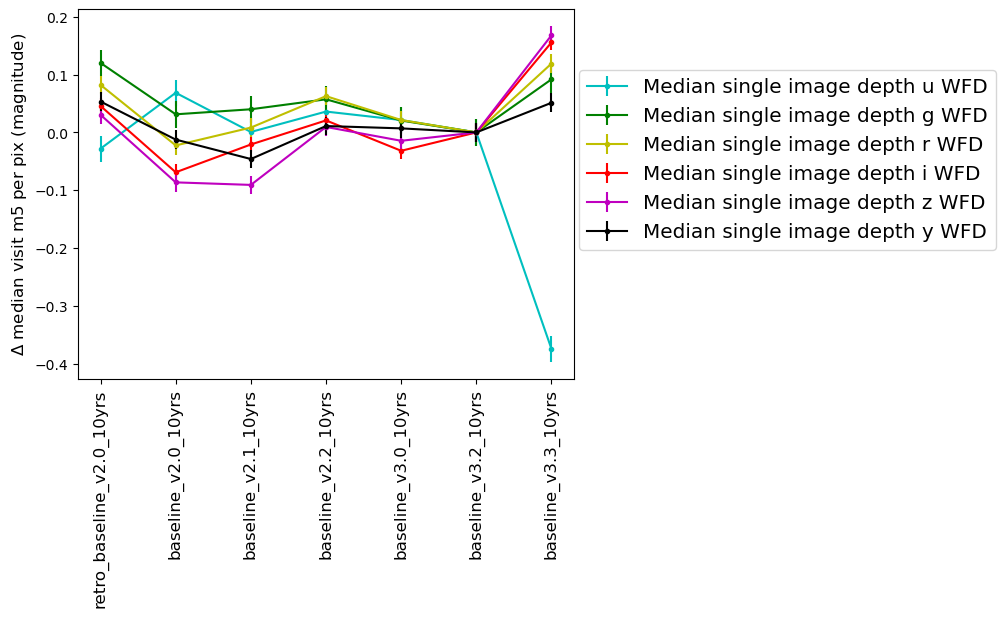

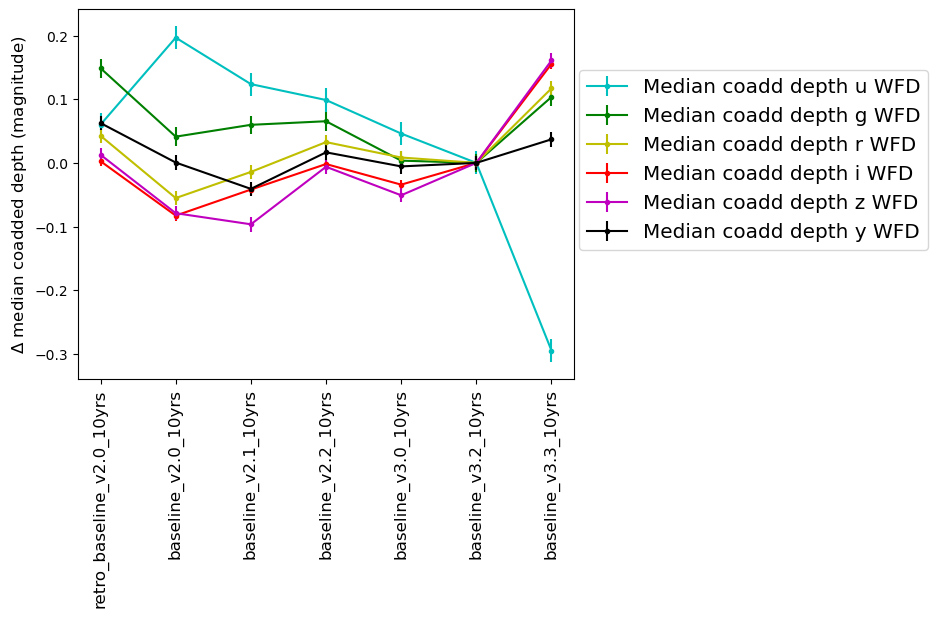

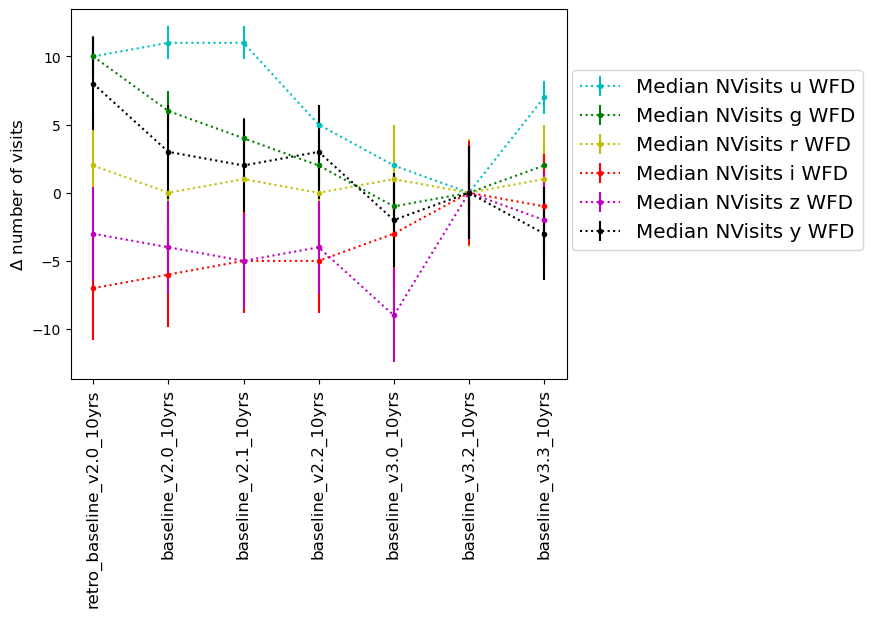

In [336]:
k = 'WFD Depths'
baseline = 'baseline_v3.2_10yrs'

msub = metric_sets.loc[k].query('metric.str.contains("Mean Median")')
fig, ax = plot_metric(summaries.loc[baselines] - summaries.loc[baseline], dev, baselines, msub)
ax.set_ylabel("$\Delta$ median visit m5 per pix (magnitude)", fontsize='large')
fig.savefig(os.path.join(outdir, 'visit_m5_per_pix' + '.png'), format='png')


msub = metric_sets.loc[k].query('metric.str.contains("Coadd")')
fig, ax = plot_metric(summaries.loc[baselines] - summaries.loc[baseline], dev, baselines, msub)
ax.set_ylabel("$\Delta$ median coadded depth (magnitude)", fontsize='large')
fig.savefig(os.path.join(outdir, 'coadd_m5_per_pix' + '.png'), format='png')

msub = metric_sets.loc[k].query('metric.str.contains("NVisits")')
fig, ax = plot_metric(summaries.loc[baselines] - summaries.loc[baseline], dev, baselines, msub)
ax.set_ylabel("$\Delta$ number of visits", fontsize='large')
fig.savefig(os.path.join(outdir, 'nvisit_per_pix'+ '.png'), format='png')

print(dev[metric_sets.loc[k]['metric']])
summaries.loc[baselines, metric_sets.loc[k]['metric']] #- summaries.loc[baseline, metric_sets.loc[k]['metric']]

In [337]:
depthcols = [m for m in summaries if "fiveSigmaDepth" in m and 'u band' in m and "UniSlicer" in m
             and ("Mean" in m or "Median" in m or "%ile" in m) and "WFD" in m and "Yr 1" not in m]
airmasscols = [m for m in summaries if "airmass" in m and "u band" in m and "UniSlicer" in m and ("Min" in m or "Mean" in m) and "WFD" in m and "norm" not in m]
seeingcols = [m for m in summaries if "seeingEff" in m and "u band" in m and "UniSlicer" in m and ("Min" in m or "Mean" in m) and "WFD" in m]
skybrightnesscols = [m for m in summaries if "skyBrightness" in m and "u band" in m and "UniSlicer" in m and ("Max" in m or "Mean" in m) and "WFD" in m]
cols = depthcols
cols

['Identity 25th%ile fiveSigmaDepth WFD u band UniSlicer',
 'Identity 75th%ile fiveSigmaDepth WFD u band UniSlicer',
 'Identity Mean fiveSigmaDepth WFD u band UniSlicer',
 'Identity Median fiveSigmaDepth WFD u band UniSlicer']

metric
Identity 25th%ile fiveSigmaDepth WFD u band UniSlicer    0.029704
Identity 75th%ile fiveSigmaDepth WFD u band UniSlicer    0.016623
Identity Mean fiveSigmaDepth WFD u band UniSlicer        0.023641
Identity Median fiveSigmaDepth WFD u band UniSlicer      0.021943
dtype: float64
metric
Identity 25th%ile fiveSigmaDepth WFD u band UniSlicer    0.029704
Identity 75th%ile fiveSigmaDepth WFD u band UniSlicer    0.016623
Identity Mean fiveSigmaDepth WFD u band UniSlicer        0.023641
Identity Median fiveSigmaDepth WFD u band UniSlicer      0.021943
dtype: float64


metric                     Identity 25th%ile fiveSigmaDepth WFD u band UniSlicer  \
run                                                                                
retro_baseline_v2.0_10yrs                                          -0.043797       
baseline_v2.0_10yrs                                                 0.073878       
baseline_v2.1_10yrs                                                 0.020236       
baseline_v2.2_10yrs                                                 0.033249       
baseline_v3.0_10yrs                                                 0.024379       
baseline_v3.2_10yrs                                                 0.000000       
baseline_v3.3_10yrs                                                -0.370495       

metric                     Identity 75th%ile fiveSigmaDepth WFD u band UniSlicer  \
run                                                                                
retro_baseline_v2.0_10yrs                                          -0.069629       
baseline_v2.0_10yrs                                                 0.065050       
baseline_v2.1_10yrs                                                -0.016819       
baseline_v2.2_10yrs                                                 0.020113       
baseline_v3.0_10yrs                                                 0.009620       
baseline_v3.2_10yrs                                                 0.000000       
baseline_v3.3_10yrs                                                -0.380736       

metric                     Identity Mean fiveSigmaDepth WFD u band UniSlicer  \
run                                                                            
retro_baseline_v2.0_10yrs                                          -0.055369   
baseline_v2.0_10yrs                                                 0.073743   
baseline_v2.1_10yrs                                                 0.005365   
baseline_v2.2_10yrs                                                 0.027628   
baseline_v3.0_10yrs                                                 0.017390   
baseline_v3.2_10yrs                                                 0.000000   
baseline_v3.3_10yrs                                                -0.371011   

metric                     Identity Median fiveSigmaDepth WFD u band UniSlicer  
run                                                                             
retro_baseline_v2.0_10yrs                                          -0.056935    
baseline_v2.0_10yrs                                                 0.063475    
baseline_v2.1_10yrs                                                -0.001237    
baseline_v2.2_10yrs                                                 0.025266    
baseline_v3.0_10yrs                                                 0.013815    
baseline_v3.2_10yrs                                                 0.000000    
baseline_v3.3_10yrs                                                -0.375782

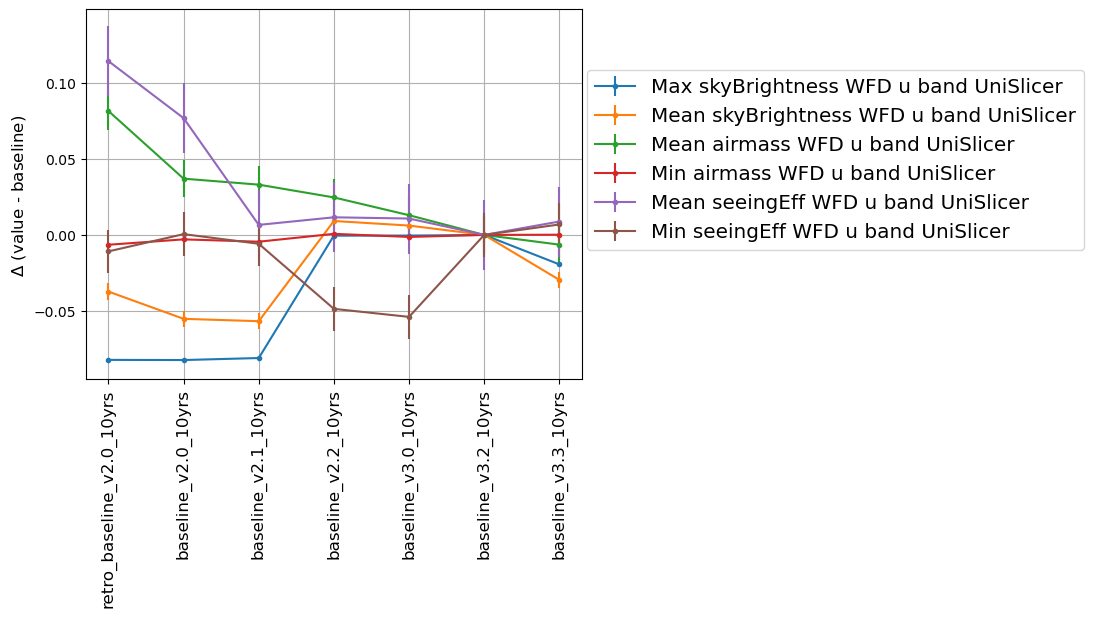

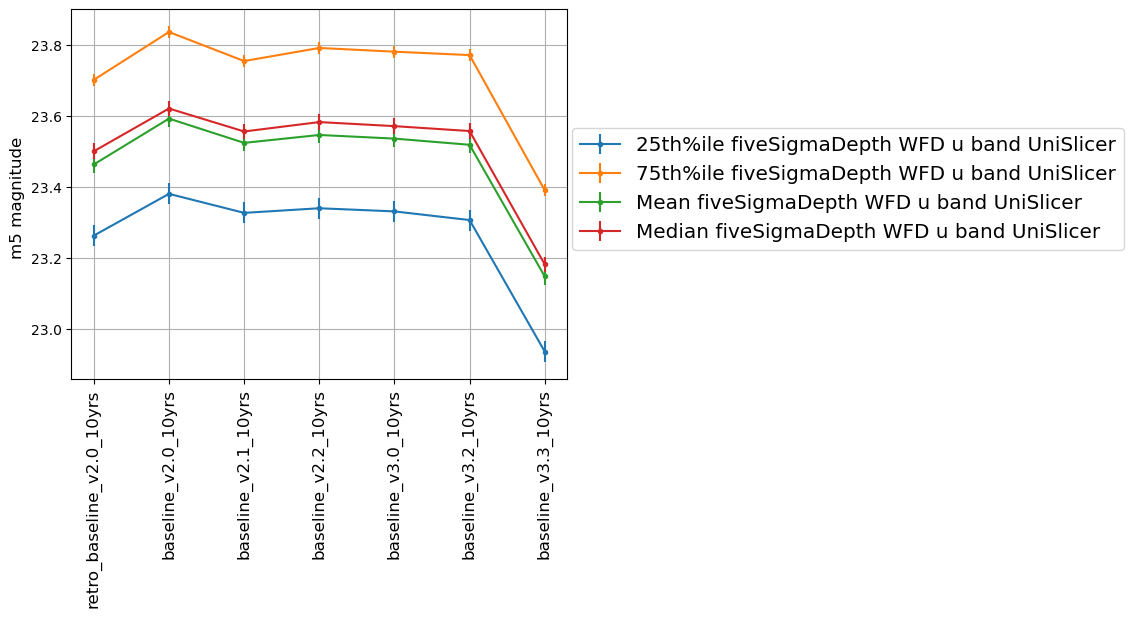

In [338]:
fig = plt.figure()
for cols in [skybrightnesscols, airmasscols, seeingcols]:
    if cols == skybrightnesscols:
        sign = 1
    else:
        sign = -1
    fig, ax = plot_metric((summaries.loc[baselines] - summaries.loc[baseline])*sign, 
                          dev, baselines, cols, fig=fig)
ax.set_ylabel("$\Delta$ (value - baseline) ", fontsize='large')
ax.grid()

fig = plt.figure()
for cols in [depthcols]:
    fig, ax = plot_metric(summaries.loc[baselines], # - summaries.loc[baseline], 
                          dev, baselines, cols, fig=fig)
plt.legend(loc=(1.01, 0.35), fontsize='x-large')
ax.tick_params(axis='x', labelrotation = 90, labelsize='large')
ax.set_ylabel(f"m5 magnitude ", fontsize='large')
ax.grid()
fig.savefig(os.path.join(outdir, 'u_m5_per_visit'+ '.png'), format='png')

print(dev[cols])
summaries.loc[baselines, cols]

print(dev[cols])
summaries.loc[baselines, cols] - summaries.loc[baseline, cols]

['Identity Mean fiveSigmaDepth WFD u band UniSlicer', 'Identity Mean fiveSigmaDepth WFD g band UniSlicer', 'Identity Mean fiveSigmaDepth WFD r band UniSlicer', 'Identity Mean fiveSigmaDepth WFD i band UniSlicer', 'Identity Mean fiveSigmaDepth WFD z band UniSlicer', 'Identity Mean fiveSigmaDepth WFD y band UniSlicer']
metric
Identity Mean fiveSigmaDepth WFD u band UniSlicer    0.023641
Identity Mean fiveSigmaDepth WFD g band UniSlicer    0.020333
Identity Mean fiveSigmaDepth WFD r band UniSlicer    0.015675
Identity Mean fiveSigmaDepth WFD i band UniSlicer    0.014674
Identity Mean fiveSigmaDepth WFD z band UniSlicer    0.015992
Identity Mean fiveSigmaDepth WFD y band UniSlicer    0.017006
dtype: float64


run                           v3.2  v3.3
metric                                  
Mean m5 WFD u band per image   0.0 -0.37
Mean m5 WFD g band per image   0.0  0.10
Mean m5 WFD r band per image   0.0  0.11
Mean m5 WFD i band per image   0.0  0.16
Mean m5 WFD z band per image   0.0  0.17
Mean m5 WFD y band per image   0.0  0.05

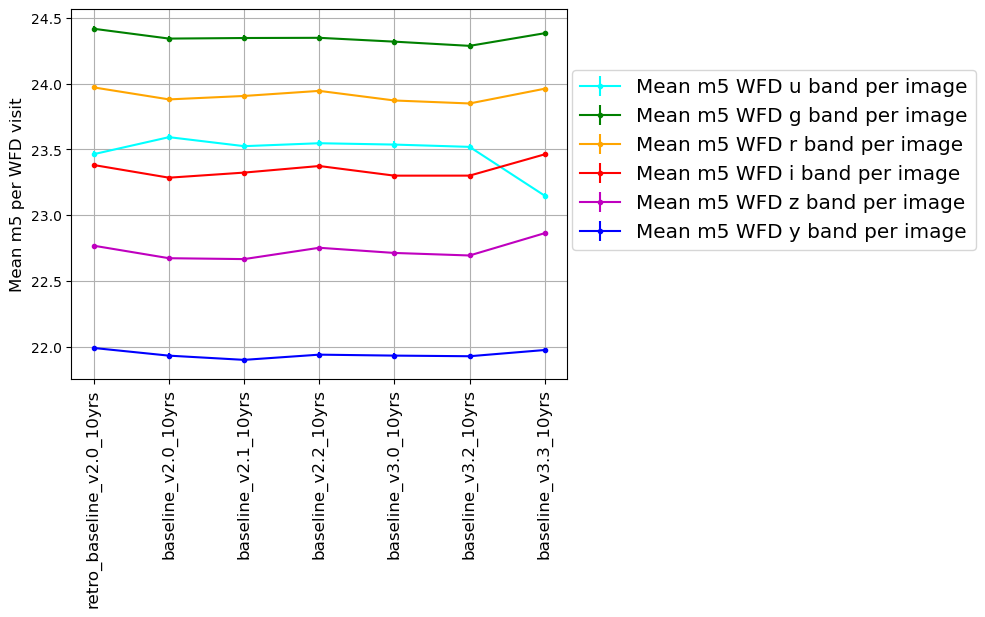

In [339]:
cols = [m for m in summaries if "fiveSigmaDepth" in m and 'band' in m and "UniSlicer" in m
             and ("Mean" in m) and "WFD" in m and "Yr 1" not in m and 'all' not in m]
cols = [f'Identity Mean fiveSigmaDepth WFD {f} band UniSlicer' for f in 'ugrizy']
newcols = [f'Mean m5 WFD {f} band per image' for f in 'ugrizy']
print(cols)

mset = maf.create_metric_set_df('VisitDepths', metrics=cols, short_name=newcols, invert=False, mag=True) 

fig, ax = plt.subplots() 
for f, col, newcol in zip(['u', 'g', 'r', 'i', 'z', 'y'], cols, newcols):
    ax.errorbar(baselines, summaries.loc[baselines, col].values, yerr=dev[col], 
                color=filter_colors[f], marker='.', linestyle='-', label=newcol)
ax.set_ylabel(f"Mean m5 per WFD visit", fontsize='large')
plt.legend(loc=(1.01, 0.35), fontsize='x-large')
ax.tick_params(axis='x', labelrotation = 90, labelsize='large')
ax.grid()
fig.savefig(os.path.join(outdir, 'm5_per_visit'+ '.png'), format='png')

print(dev[cols])
d = (summaries.loc[baselines, cols] - summaries.loc[baseline, cols])[-2:]
d = d.rename(columns=mset.loc['VisitDepths']['short_name']).rename(index={'baseline_v3.2_10yrs': 'v3.2', 'baseline_v3.3_10yrs': 'v3.3'}).round(2)
d.T

In [340]:
cols = [m for m in summaries if "Teff All sky all bands" in m and "UniSlicer" in m and "Normalized" not in m]
cols

d = summaries.loc[baselines, cols]/summaries.loc[baseline, cols]
d = d.rename(columns={'Identity Total Teff All sky all bands UniSlicer': "Teff Total"})
d.round(2)[-2:]

metric               Teff Total
run                            
baseline_v3.2_10yrs         1.0
baseline_v3.3_10yrs         1.2

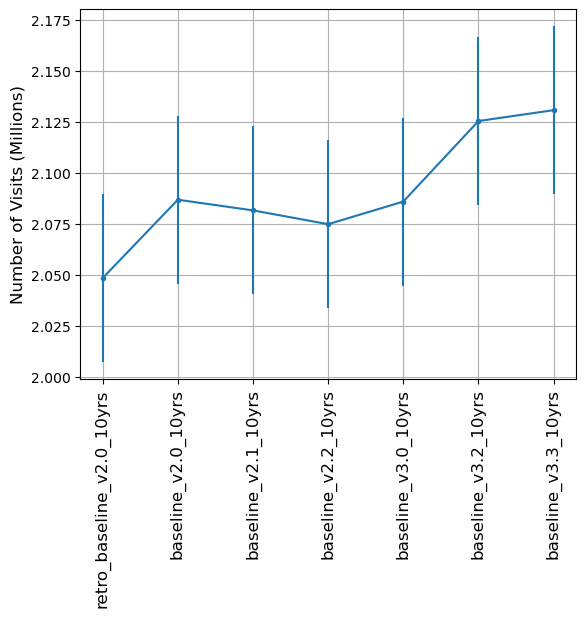

In [341]:
cols = [m for m in summaries if "Nvisits" in m and "UniSlicer" in m and 'All' in m]
cols

fig, ax = plt.subplots() 
for col in cols:
    ax.errorbar(baselines, summaries.loc[baselines, col].values/1e6, yerr=dev[col]/1e6, 
                marker='.', linestyle='-', label="Number of Visits")
ax.set_ylabel(f"Number of Visits (Millions)", fontsize='large')
#plt.legend(loc=(1.01, 0.35), fontsize='x-large')
ax.tick_params(axis='x', labelrotation = 90, labelsize='large')
ax.grid()
fig.savefig(os.path.join(outdir, 'total_nvisits'+ '.png'), format='png')

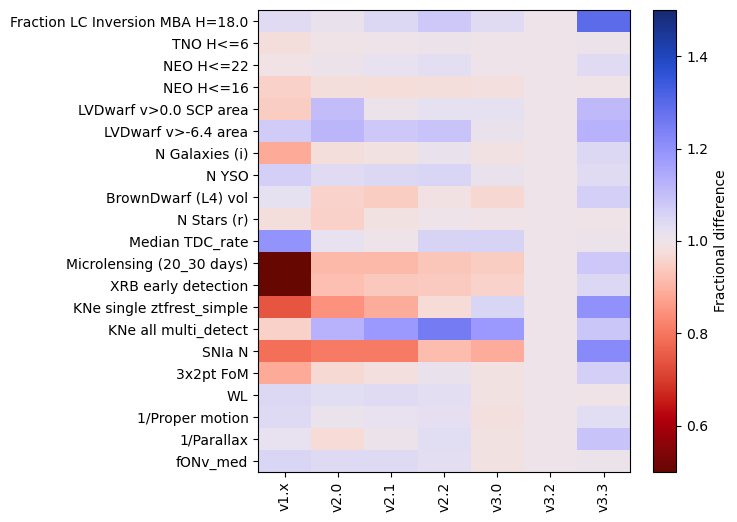

In [375]:
msub = metric_sets.loc['SCOC']
fig, ax = maf.plot_run_metric_mesh(summaries.loc[baselines, msub['metric']], 
                     baseline_run=baseline,
                     metric_set=msub,
                        metric_label_map=msub['short_name'],
                        run_label_map=baseline_dict)
fig.savefig(os.path.join(outdir, 'scoc_grid'+ '.png'), format='png')

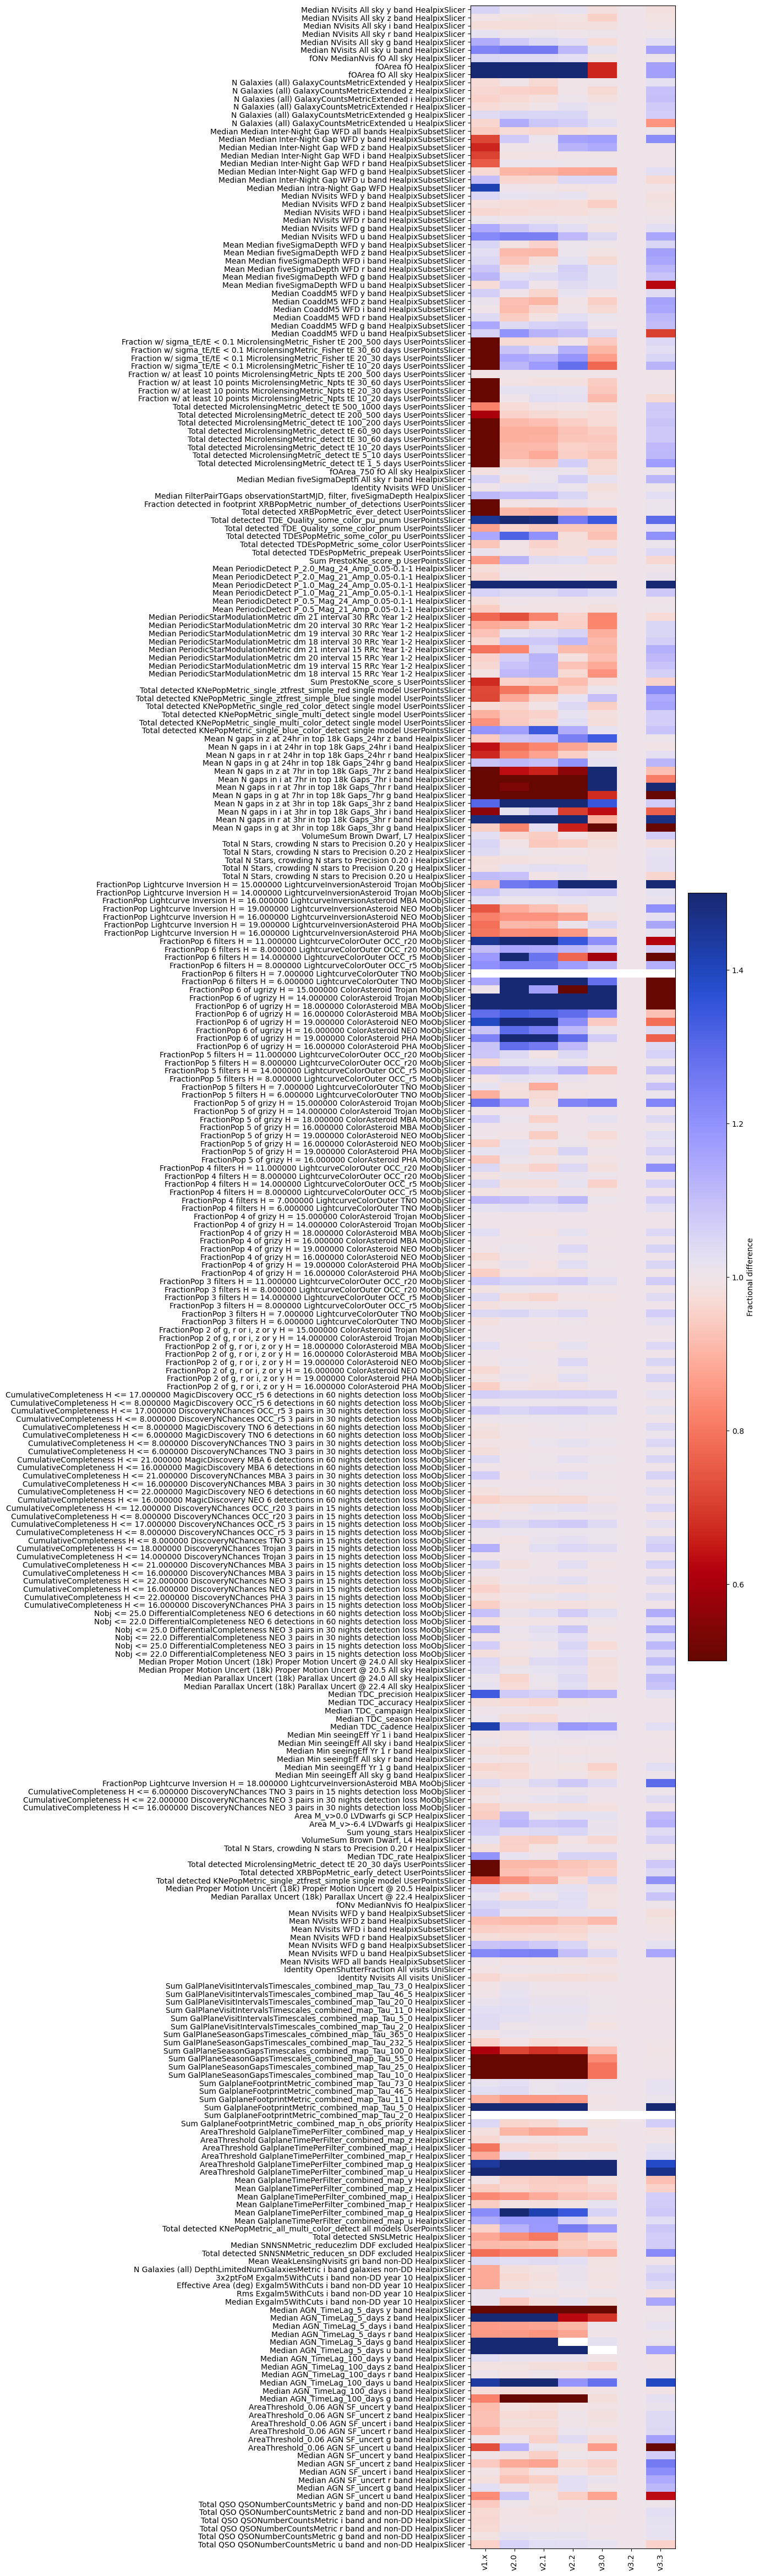

In [381]:
# Plot allll the metrics
non_dd = [m for m in msets if 'DD' not in m]
msub = metric_sets.loc[non_dd].reset_index(drop=True).drop('style', axis=1).drop('short_name', axis=1)
msub = msub.drop_duplicates().set_index('metric', drop=False, verify_integrity=True)

fig, ax = maf.plot_run_metric_mesh(summaries.loc[baselines, msub['metric']], 
                     baseline_run=baseline,
                     metric_set=msub,
                        #metric_label_map=msub['short_name'],
                        run_label_map=baseline_dict)
#fig.set_figwidth(24)
fig.set_figheight(60)
fig.savefig(os.path.join(outdir, 'all_grid'+ '.png'), format='png')

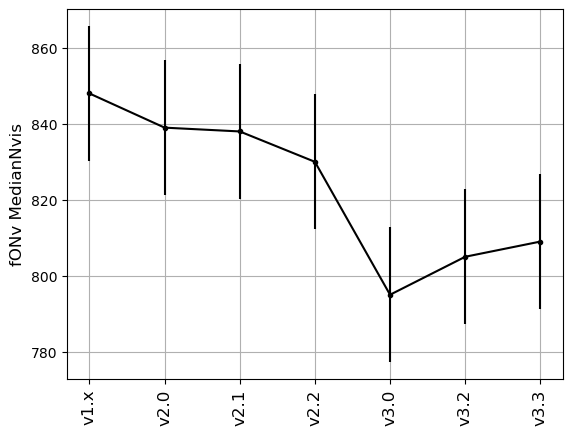

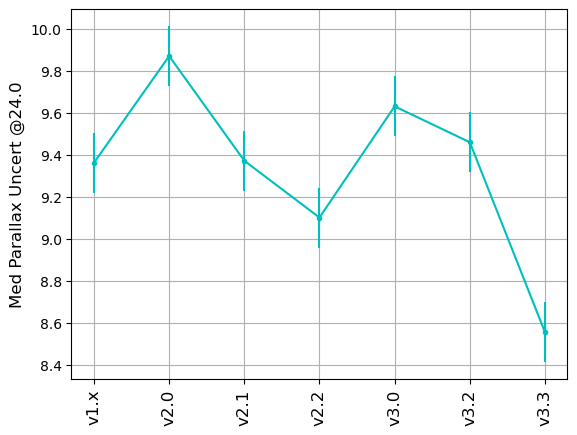

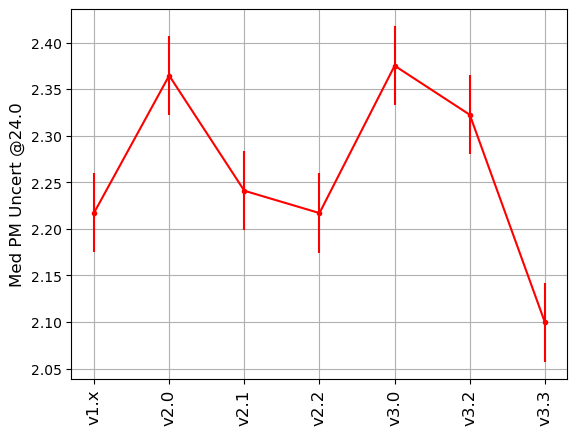

In [343]:
msub = metric_sets.loc['SRD'][::2]

for i, m in msub.iterrows():
    fig, ax = plt.subplots() 
    ax.errorbar(list(baseline_dict.values()), summaries.loc[baselines, m['metric']], yerr=dev[m['metric']], 
                color=m['style'][0], marker='.', linestyle='-', label=m['short_name'])
    ax.set_ylabel(m['short_name'], fontsize='large')
    ax.tick_params(axis='x', labelrotation = 90, labelsize='large')
    ax.grid()
    fig.savefig(os.path.join(outdir, m['short_name'] + '.png'), format='png')

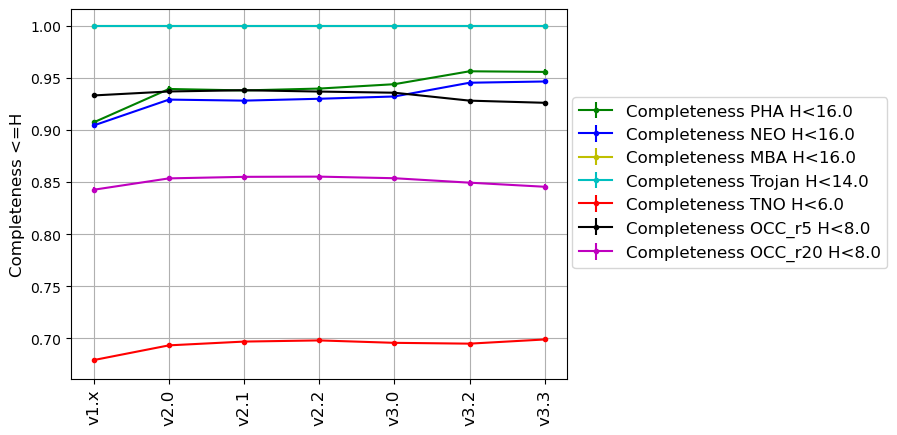

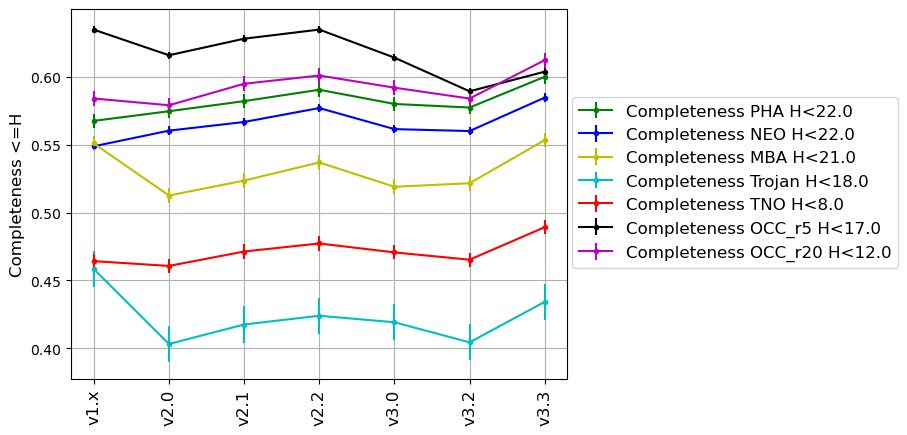

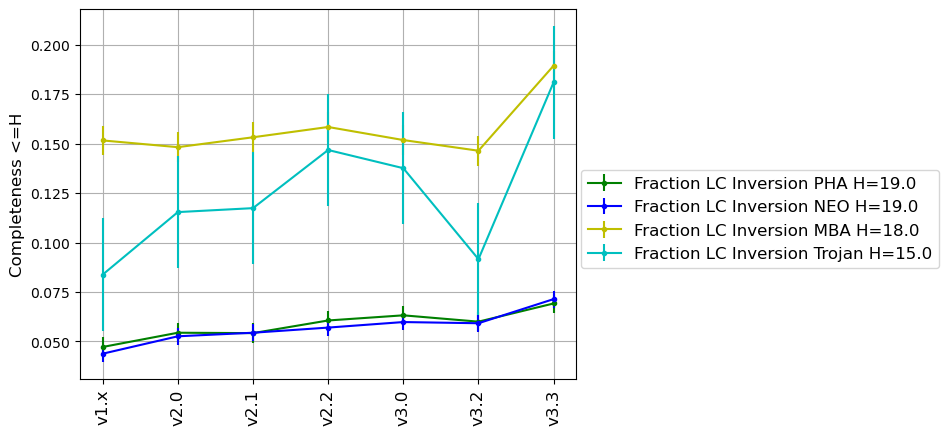

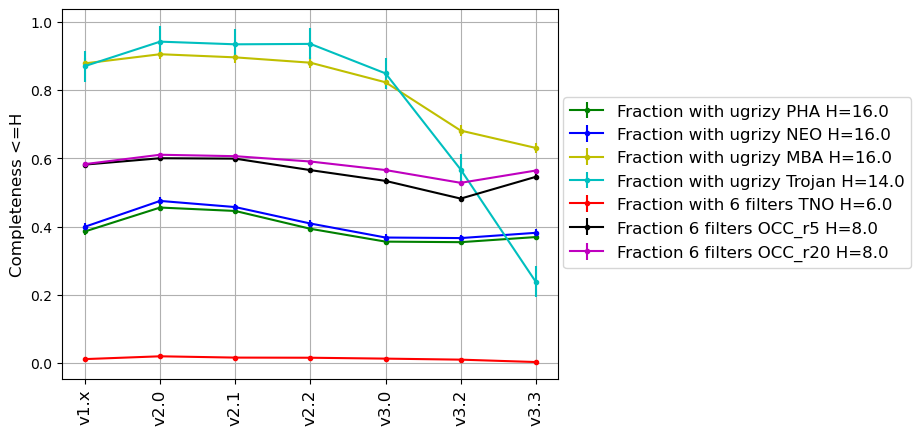

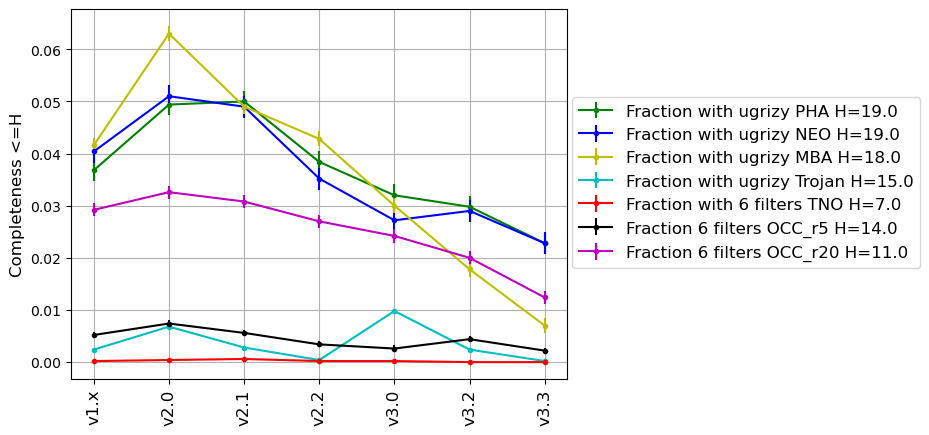

In [380]:
msub = metric_sets.loc['SSO discovery'][::2]

fig, ax = plt.subplots() 
for i, m in msub.iterrows():
    ax.errorbar(list(baseline_dict.values()), summaries.loc[baselines, m['metric']], yerr=dev[m['metric']], 
                color=m['style'][0], marker='.', linestyle='-', label=m['short_name'])
ax.legend(loc=(1.01, 0.3), fancybox=True, fontsize='large')
ax.set_ylabel('Completeness <=H', fontsize='large')
ax.tick_params(axis='x', labelrotation = 90, labelsize='large')
ax.grid()
fig.savefig(os.path.join(outdir, 'completeness_bright' + '.png'), format='png')

msub = metric_sets.loc['SSO discovery'][1::2]

fig, ax = plt.subplots() 
for i, m in msub.iterrows():
    ax.errorbar(list(baseline_dict.values()), summaries.loc[baselines, m['metric']], yerr=dev[m['metric']], 
                color=m['style'][0], marker='.', linestyle='-', label=m['short_name'])
ax.legend(loc=(1.01, 0.3), fancybox=True, fontsize='large')
ax.set_ylabel('Completeness <=H', fontsize='large')
ax.tick_params(axis='x', labelrotation = 90, labelsize='large')
ax.grid()
fig.savefig(os.path.join(outdir, 'completeness_faint' + '.png'), format='png')

msub = metric_sets.loc['SSO lightcurve inversion'][1::2]
fig, ax = plt.subplots() 
for i, m in msub.iterrows():
    ax.errorbar(list(baseline_dict.values()), summaries.loc[baselines, m['metric']], yerr=dev[m['metric']], 
                color=m['style'][0], marker='.', linestyle='-', label=m['short_name'])
ax.legend(loc=(1.01, 0.3), fancybox=True, fontsize='large')
ax.set_ylabel('Completeness <=H', fontsize='large')
ax.tick_params(axis='x', labelrotation = 90, labelsize='large')
ax.grid()
fig.savefig(os.path.join(outdir, 'lightcurves_faint' + '.png'), format='png')

msub = metric_sets.loc['SSO fraction 6 bands'][::2]
fig, ax = plt.subplots() 
for i, m in msub.iterrows():
    ax.errorbar(list(baseline_dict.values()), summaries.loc[baselines, m['metric']], yerr=dev[m['metric']], 
                color=m['style'][0], marker='.', linestyle='-', label=m['short_name'])
ax.legend(loc=(1.01, 0.3), fancybox=True, fontsize='large')
ax.set_ylabel('Completeness <=H', fontsize='large')
ax.tick_params(axis='x', labelrotation = 90, labelsize='large')
ax.grid()
fig.savefig(os.path.join(outdir, 'colors6_bright' + '.png'), format='png')

msub = metric_sets.loc['SSO fraction 6 bands'][1::2]
fig, ax = plt.subplots() 
for i, m in msub.iterrows():
    ax.errorbar(list(baseline_dict.values()), summaries.loc[baselines, m['metric']], yerr=dev[m['metric']], 
                color=m['style'][0], marker='.', linestyle='-', label=m['short_name'])
ax.legend(loc=(1.01, 0.3), fancybox=True, fontsize='large')
ax.set_ylabel('Completeness <=H', fontsize='large')
ax.tick_params(axis='x', labelrotation = 90, labelsize='large')
ax.grid()
fig.savefig(os.path.join(outdir, 'colors6_faint' + '.png'), format='png')

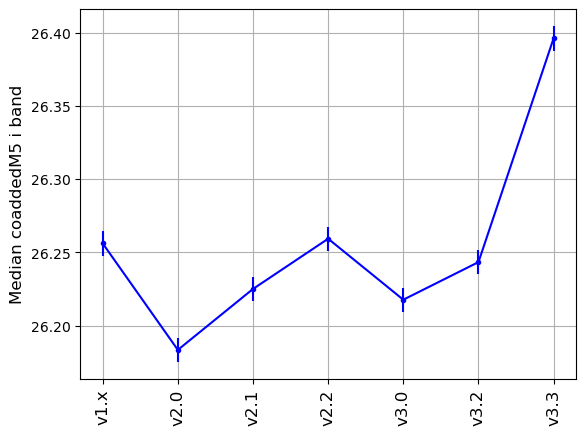

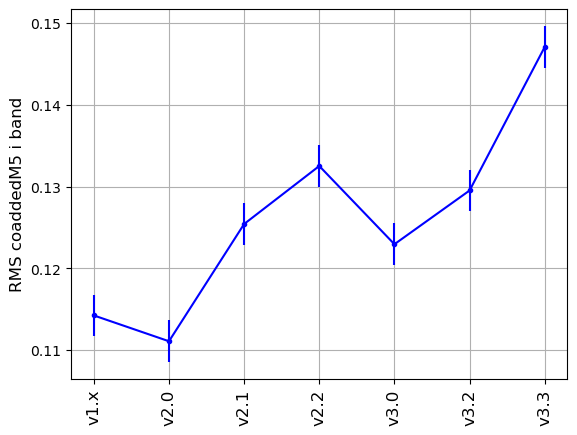

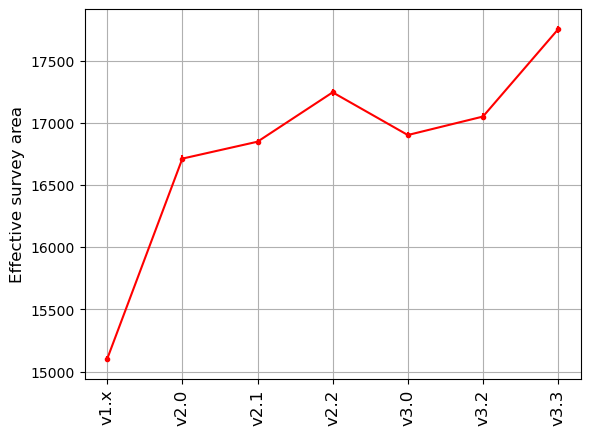

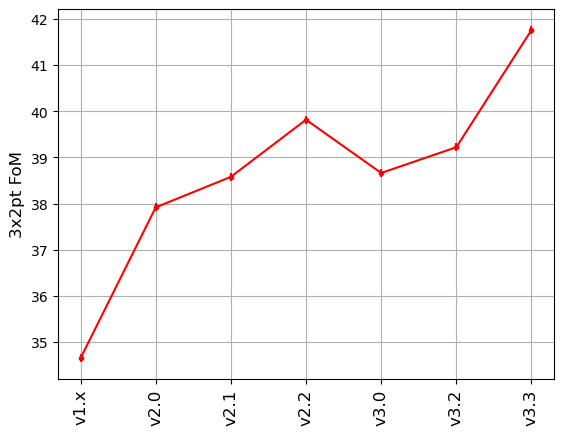

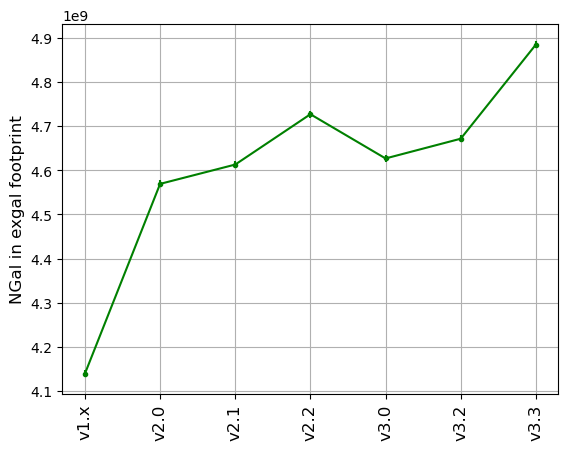

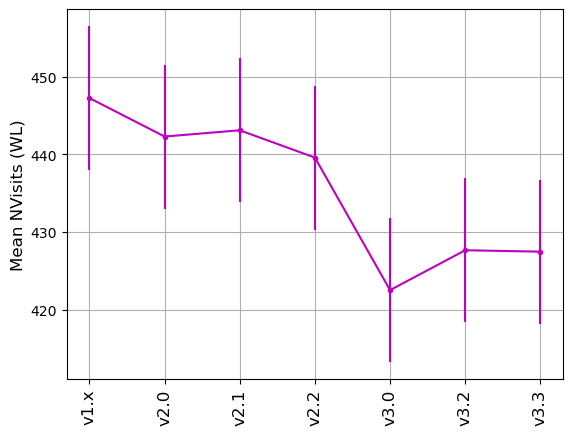

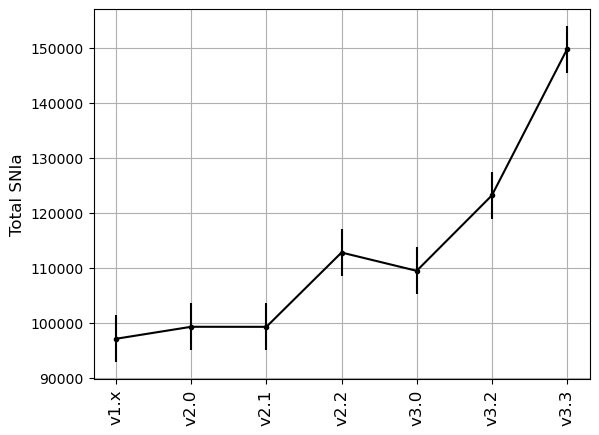

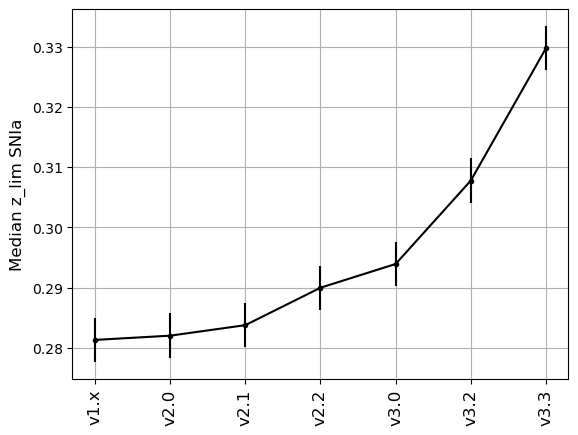

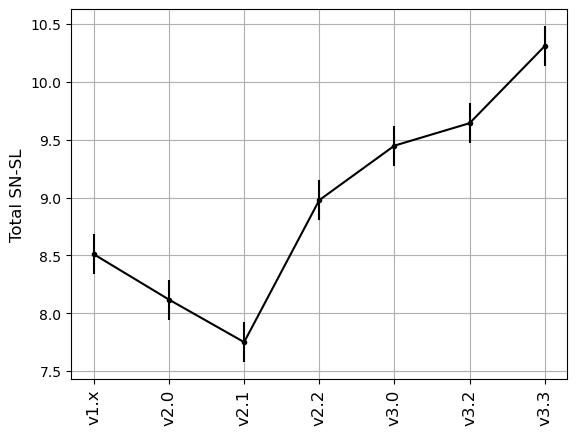

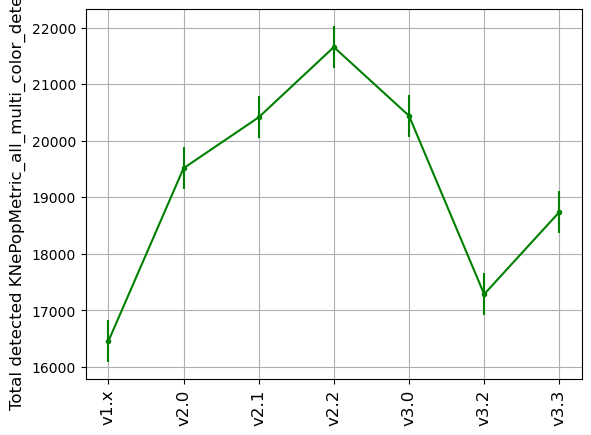

In [390]:
msub = metric_sets.loc['DESC WFD']

for i, m in msub.iterrows():
    fig, ax = plt.subplots() 
    ax.errorbar(list(baseline_dict.values()), summaries.loc[baselines, m['metric']], yerr=dev[m['metric']], 
                color=m['style'][0], marker='.', linestyle='-', label=m['short_name'])
    ax.set_ylabel(m['short_name'], fontsize='large')
    ax.tick_params(axis='x', labelrotation = 90, labelsize='large')
    ax.grid()
    fig.savefig(os.path.join(outdir, m['short_name'] + '.png'), format='png')

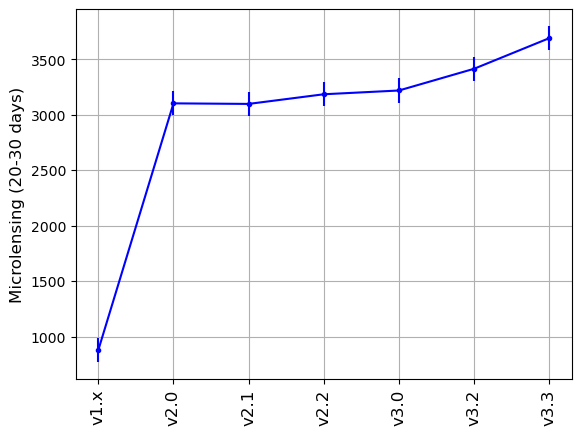

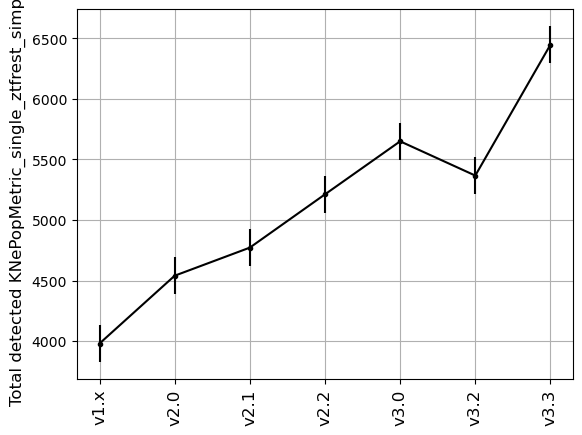

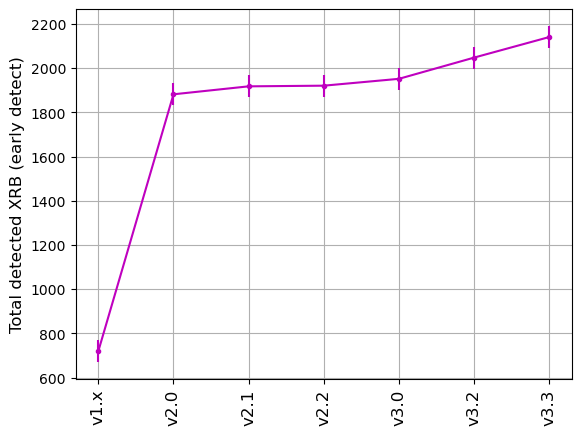

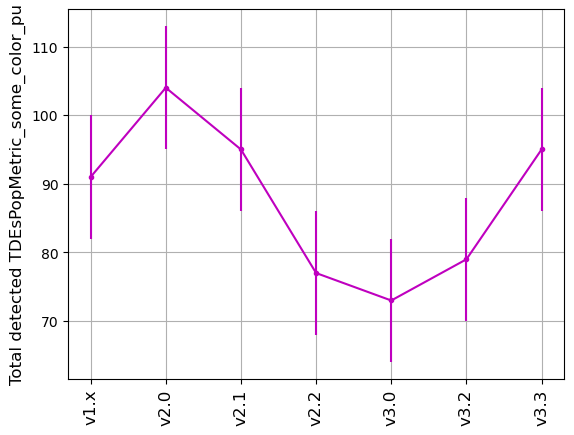

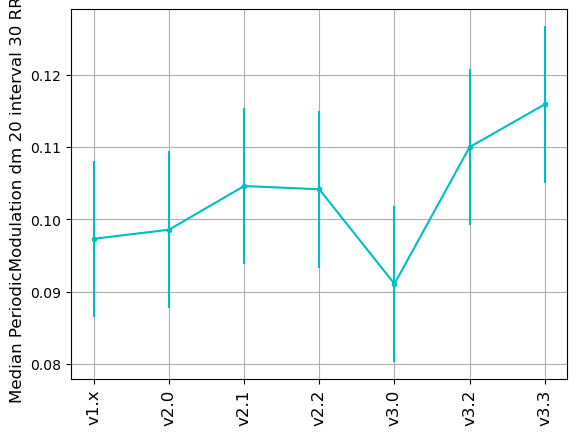

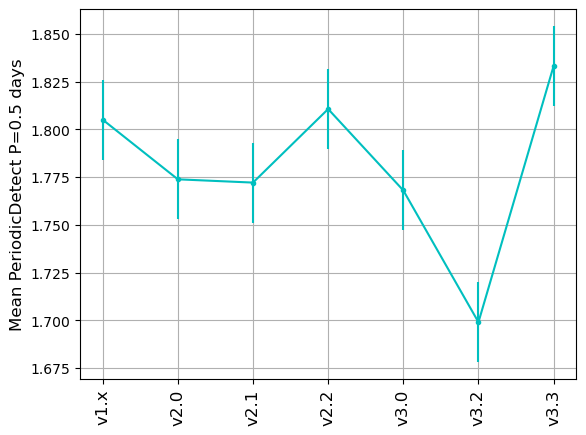

In [347]:
msub = metric_sets.loc['TVS short']

for i, m in msub.iterrows():
    fig, ax = plt.subplots() 
    ax.errorbar(list(baseline_dict.values()), summaries.loc[baselines, m['metric']], yerr=dev[m['metric']], 
                color=m['style'][0], marker='.', linestyle='-', label=m['short_name'])
    ax.set_ylabel(m['short_name'], fontsize='large')
    ax.tick_params(axis='x', labelrotation = 90, labelsize='large')
    ax.grid()
    fig.savefig(os.path.join(outdir, m['short_name'] + '.png'), format='png')

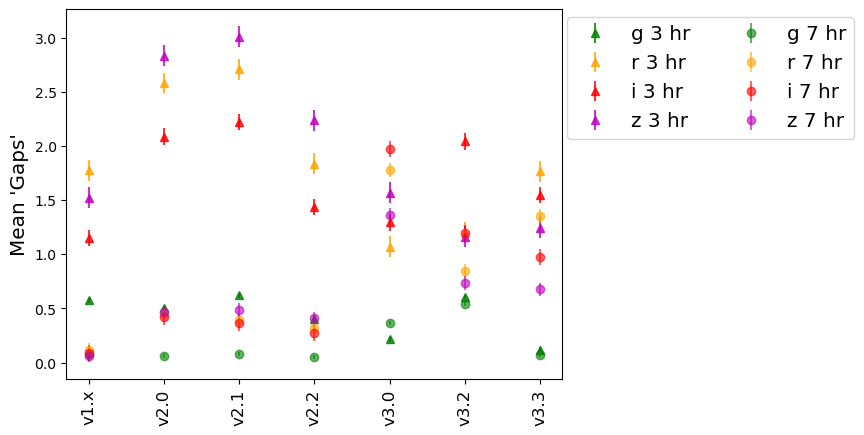

In [389]:
fig, ax = plt.subplots()
mset = metric_sets.loc['TVS Gaps'][0:-4]
#mset = metric_sets.loc['TVS Gaps'][7:11]
#mset = pd.concat([mset, metric_sets.loc['TVS Gaps'][7:11]])
#mset = metric_sets.loc['TVS Gaps'][13:-1]
#mset = pd.concat([mset, metric_sets.loc['TVS Gaps'][14:-1]])


markers = ['o', 's', '*', '<', '^', 'v', '*', '>', '.', 'X']
j = 0
for i, mm in mset.iterrows():
    m = mm['metric']
    ff = mm['short_name'].split('in ')[-1].split(' at')[0]
    #marker= markers[j]
    marker = 'o'
    if '3' in m:
        marker = '^'
        alpha=0.8
        label=f"{ff} 3 hr"
    if '7' in m:
        marker = 'o'
        alpha=0.6
        label =f"{ff} 7 hr"
    j += 1
    ax.errorbar(baseline_dict.values(), summaries.loc[baselines, m], yerr=dev[m], 
                color=filter_colors[ff], alpha=alpha, marker=marker, linestyle='', label=label)
plt.legend(loc=(1.01, 0.65), fontsize='x-large', ncols=2)
ax.set_ylabel("Mean 'Gaps'", fontsize='x-large')
ax.tick_params(axis='x', labelrotation = 90, labelsize='large')
fig.savefig(os.path.join(outdir, 'tgaps' + '.png'), format='png')

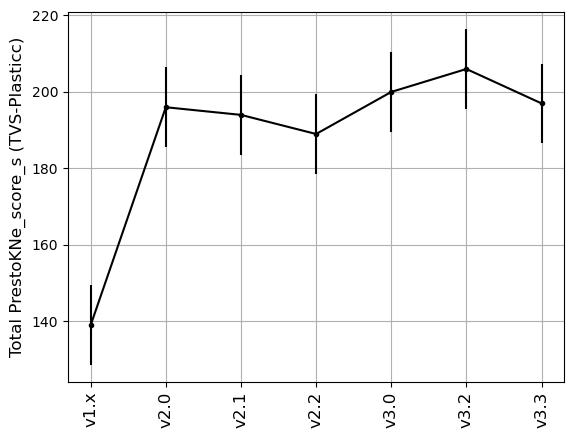

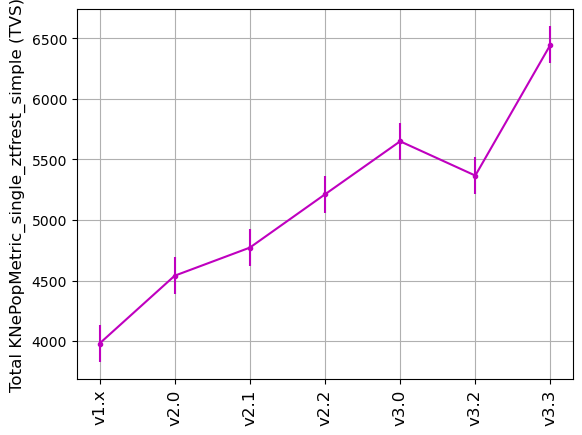

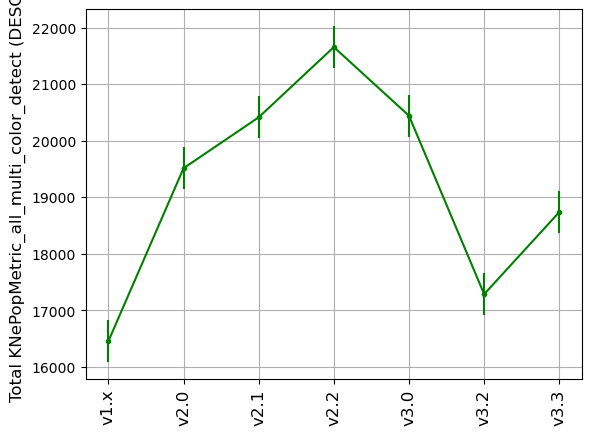

In [344]:
msub = metric_sets.loc['TVS KNe short']

for i, m in msub.iterrows():
    fig, ax = plt.subplots() 
    ax.errorbar(list(baseline_dict.values()), summaries.loc[baselines, m['metric']], yerr=dev[m['metric']], 
                color=m['style'][0], marker='.', linestyle='-', label=m['short_name'])
    ax.set_ylabel(m['short_name'], fontsize='large')
    ax.tick_params(axis='x', labelrotation = 90, labelsize='large')
    ax.grid()
    fig.savefig(os.path.join(outdir, m['short_name'] + '.png'), format='png')

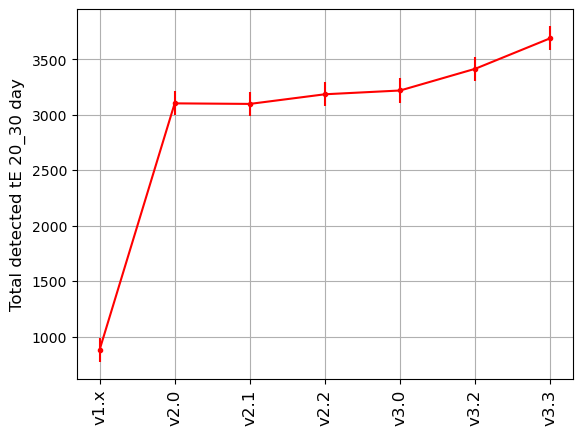

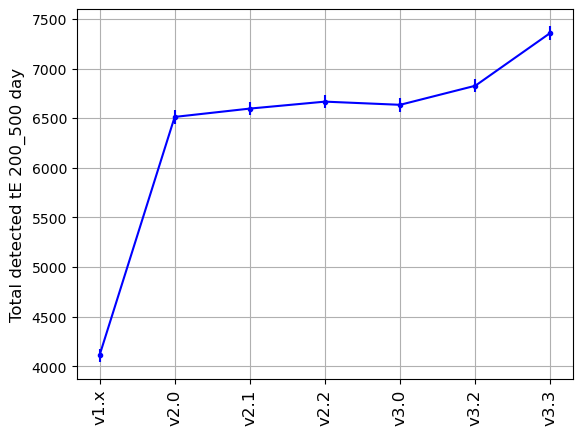

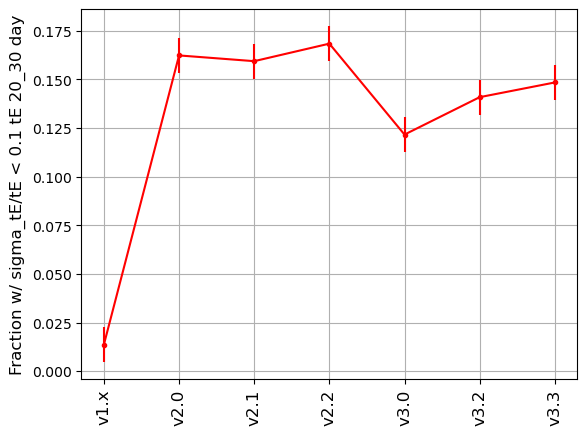

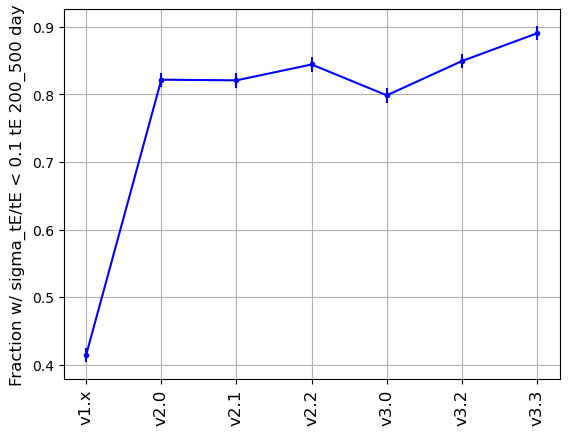

In [393]:
msub = metric_sets.loc['TVS microlensing short']

for i, m in msub.iterrows():
    fig, ax = plt.subplots() 
    ax.errorbar(list(baseline_dict.values()), summaries.loc[baselines, m['metric']], yerr=dev[m['metric']], 
                color=m['style'][0], marker='.', linestyle='-', label=m['short_name'])
    ax.set_ylabel(m['short_name'], fontsize='large')
    ax.tick_params(axis='x', labelrotation = 90, labelsize='large')
    ax.grid()
    #fig.savefig(os.path.join(outdir, m['short_name'] + '.png'), format='png')

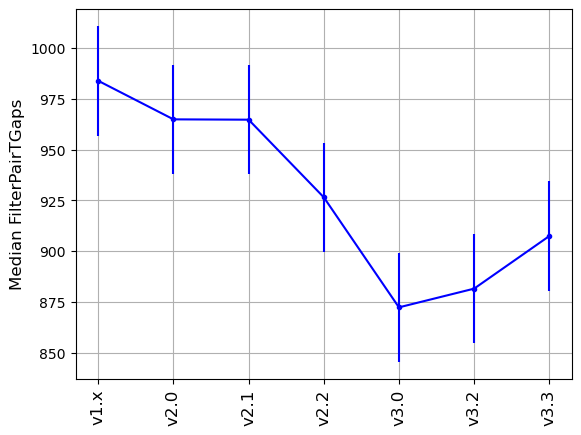

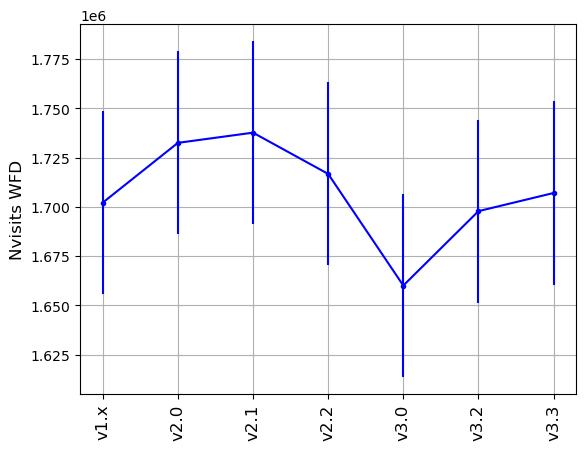

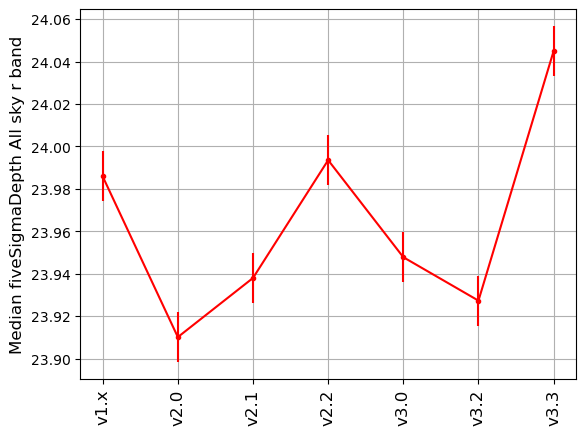

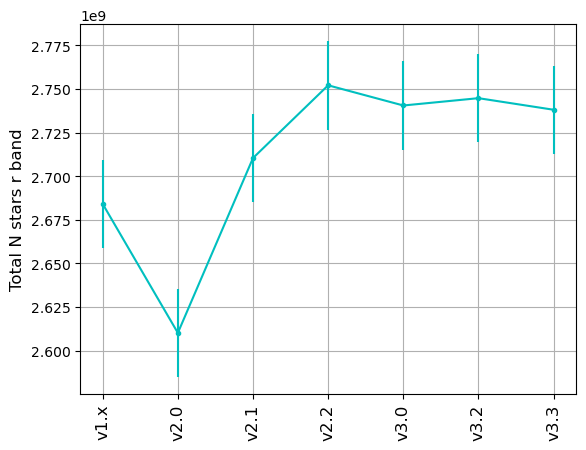

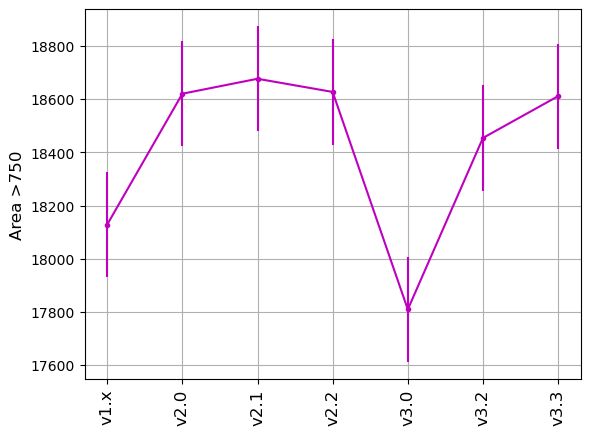

In [394]:
msub = metric_sets.loc['TVS anomalies']

for i, m in msub.iterrows():
    fig, ax = plt.subplots() 
    ax.errorbar(list(baseline_dict.values()), summaries.loc[baselines, m['metric']], yerr=dev[m['metric']], 
                color=m['style'][0], marker='.', linestyle='-', label=m['short_name'])
    ax.set_ylabel(m['short_name'], fontsize='large')
    ax.tick_params(axis='x', labelrotation = 90, labelsize='large')
    ax.grid()
    fig.savefig(os.path.join(outdir, m['short_name'] + '.png'), format='png')

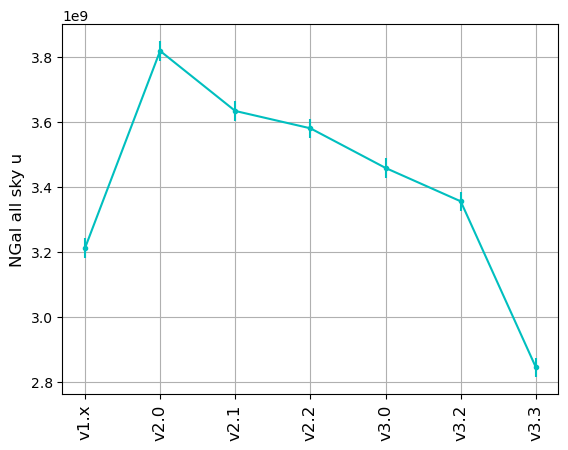

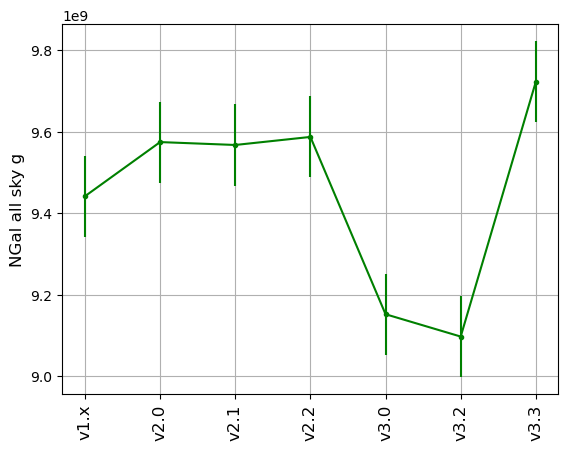

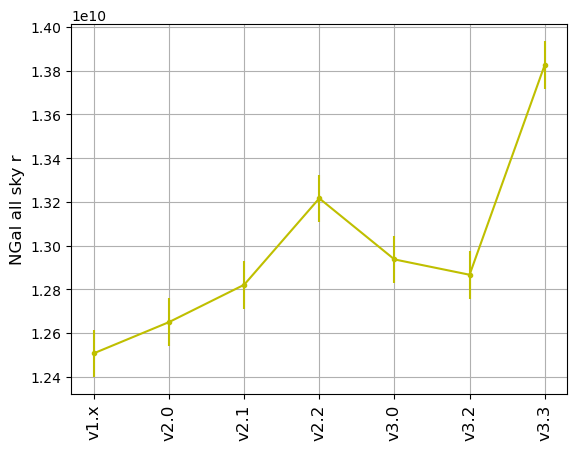

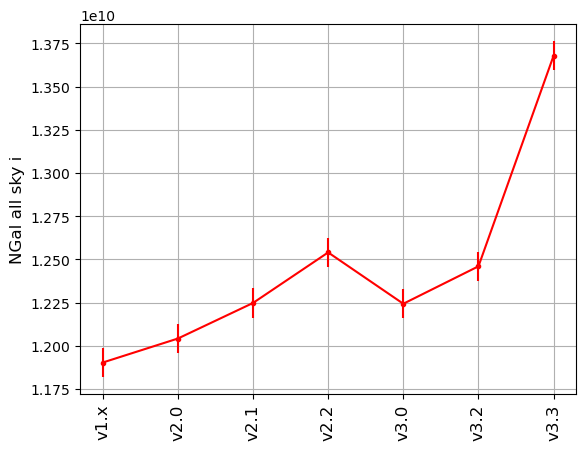

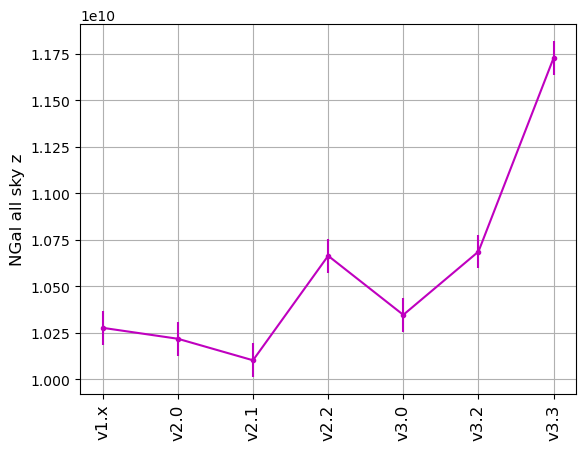

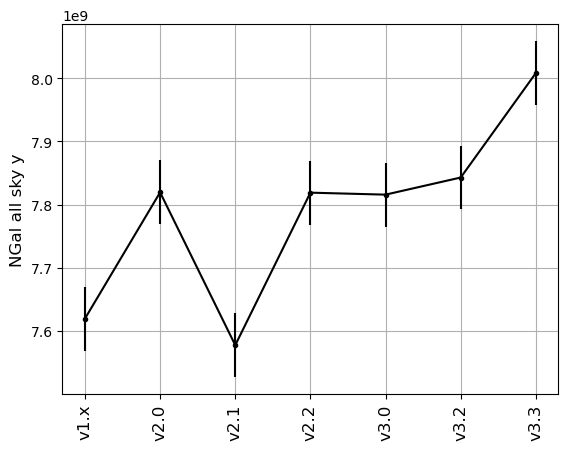

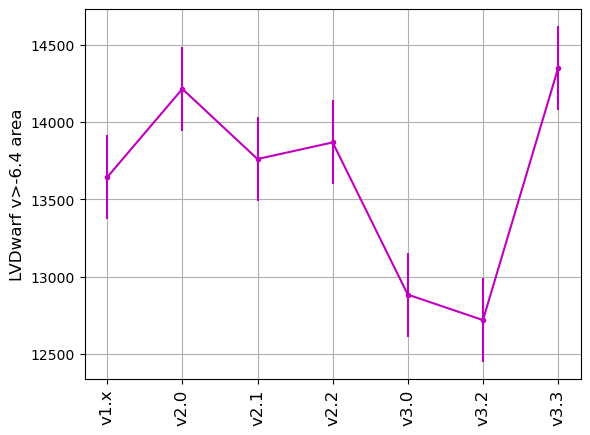

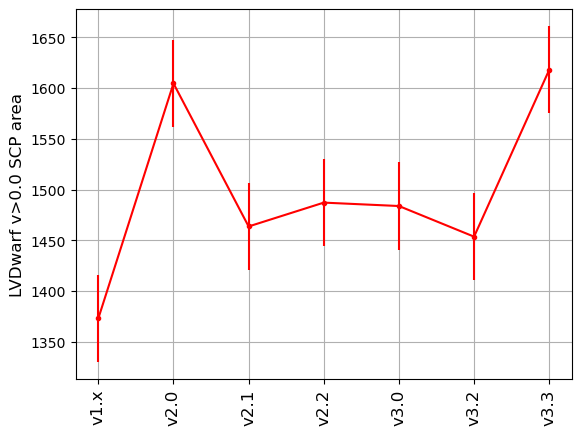

In [356]:
msub = metric_sets.loc['galaxies']

for i, m in msub.iterrows():
    fig, ax = plt.subplots() 
    ax.errorbar(list(baseline_dict.values()), summaries.loc[baselines, m['metric']], yerr=dev[m['metric']], 
                color=m['style'][0], marker='.', linestyle='-', label=m['short_name'])
    ax.set_ylabel(m['short_name'], fontsize='large')
    ax.tick_params(axis='x', labelrotation = 90, labelsize='large')
    ax.grid()
    #fig.savefig(os.path.join(outdir, m['short_name'] + '.png'), format='png')

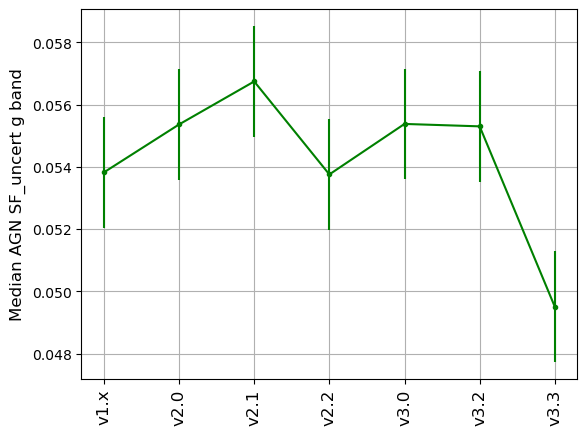

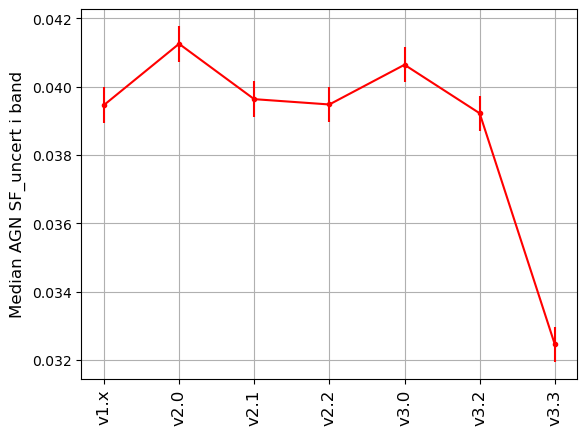

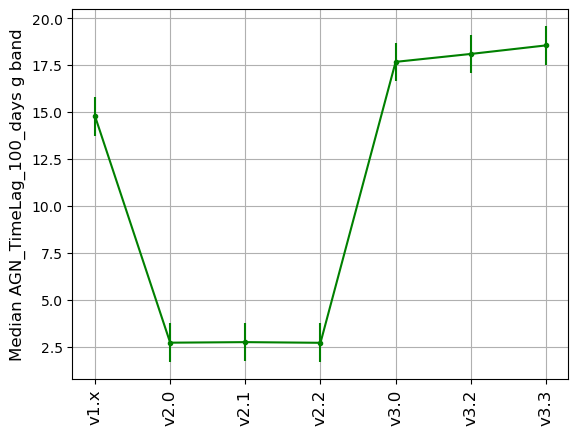

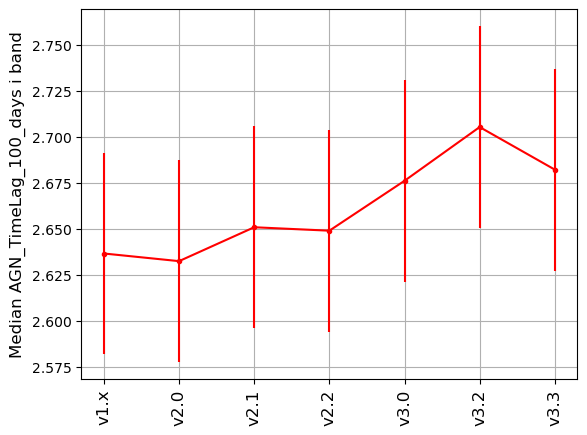

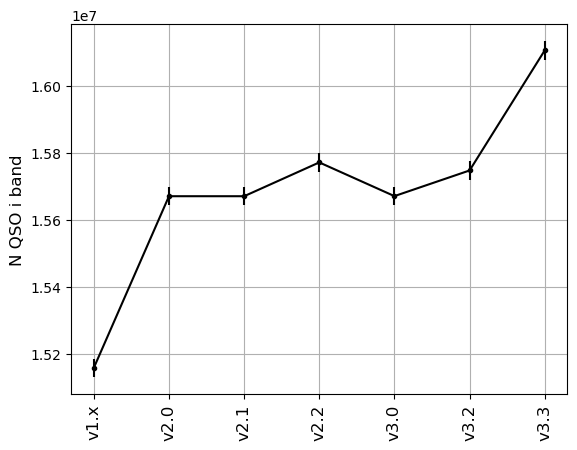

In [397]:
msub = metric_sets.loc['AGN short']

for i, m in msub.iterrows():
    fig, ax = plt.subplots() 
    ax.errorbar(list(baseline_dict.values()), summaries.loc[baselines, m['metric']], yerr=dev[m['metric']], 
                color=m['style'][0], marker='.', linestyle='-', label=m['short_name'])
    ax.set_ylabel(m['short_name'], fontsize='large')
    ax.tick_params(axis='x', labelrotation = 90, labelsize='large')
    ax.grid()
    #fig.savefig(os.path.join(outdir, m['short_name'] + '.png'), format='png')

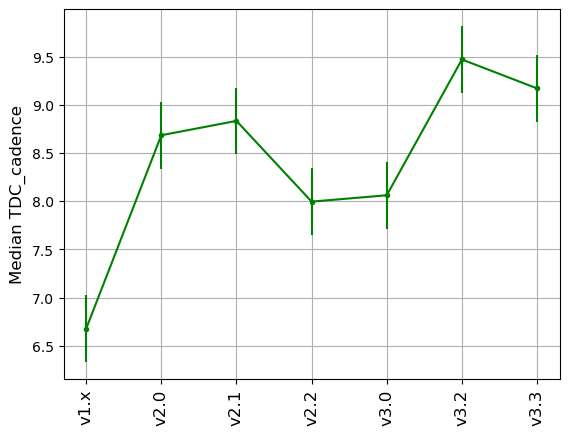

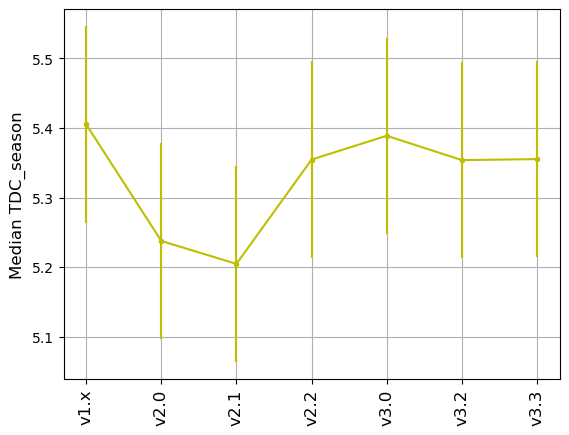

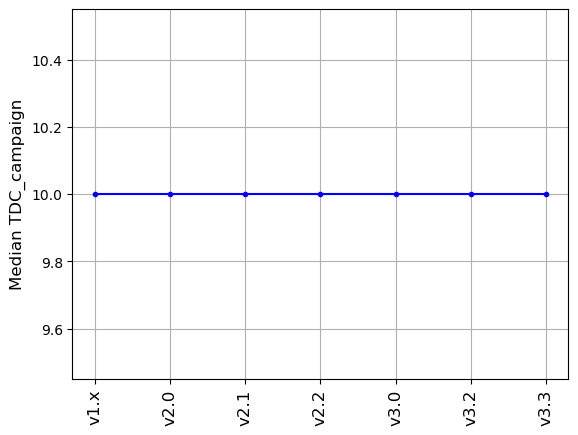

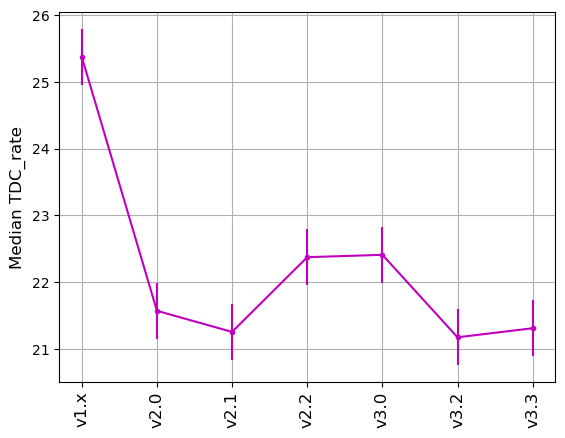

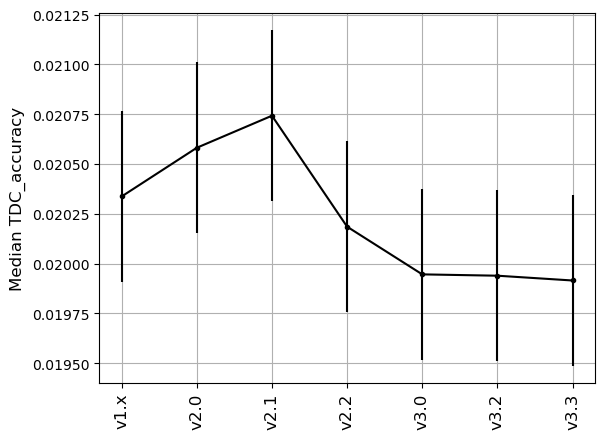

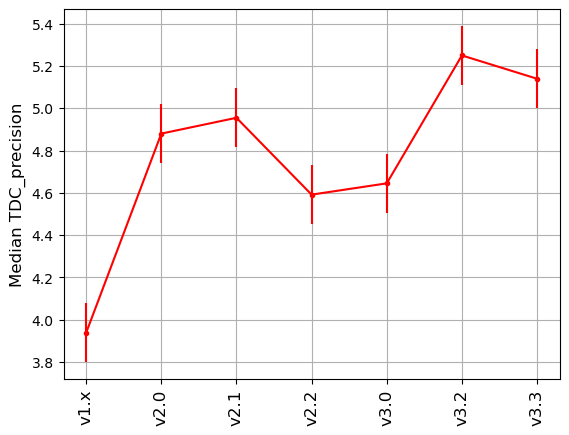

In [402]:
msub = metric_sets.loc['SL TDC']

for i, m in msub.iterrows():
    fig, ax = plt.subplots() 
    ax.errorbar(list(baseline_dict.values()), summaries.loc[baselines, m['metric']], yerr=dev[m['metric']], 
                color=m['style'][0], marker='.', linestyle='-', label=m['short_name'])
    ax.set_ylabel(m['short_name'], fontsize='large')
    ax.tick_params(axis='x', labelrotation = 90, labelsize='large')
    ax.grid()
    fig.savefig(os.path.join(outdir, m['short_name'] + '.png'), format='png')

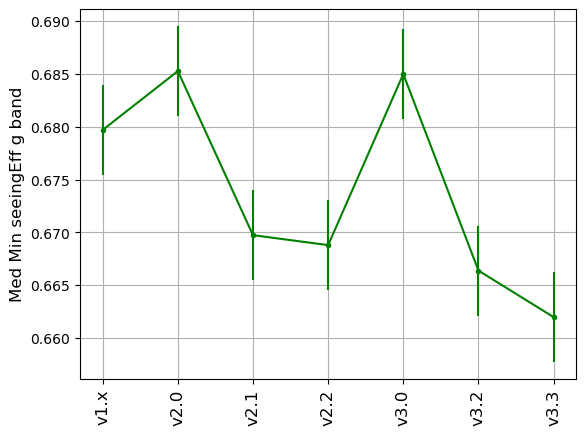

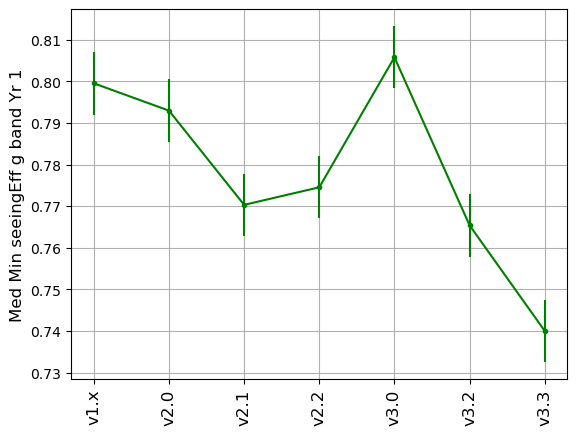

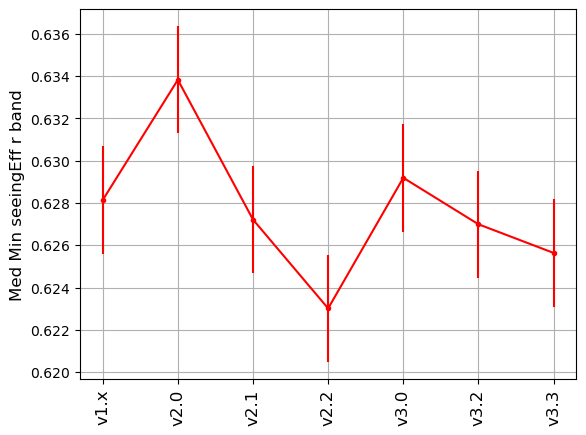

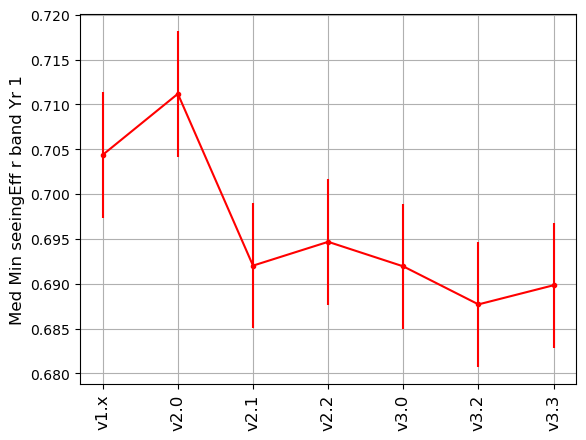

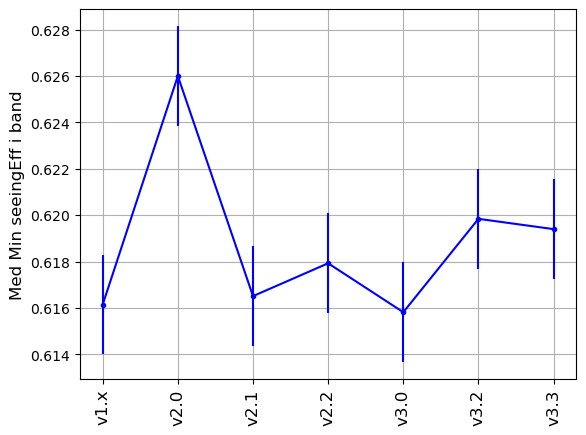

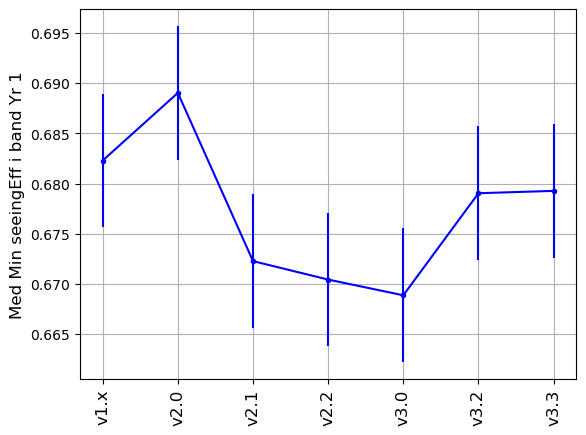

In [403]:
msub = metric_sets.loc['SL IQ']

for i, m in msub.iterrows():
    fig, ax = plt.subplots() 
    ax.errorbar(list(baseline_dict.values()), summaries.loc[baselines, m['metric']], yerr=dev[m['metric']], 
                color=m['style'][0], marker='.', linestyle='-', label=m['short_name'])
    ax.set_ylabel(m['short_name'], fontsize='large')
    ax.tick_params(axis='x', labelrotation = 90, labelsize='large')
    ax.grid()
    fig.savefig(os.path.join(outdir, m['short_name'] + '.png'), format='png')

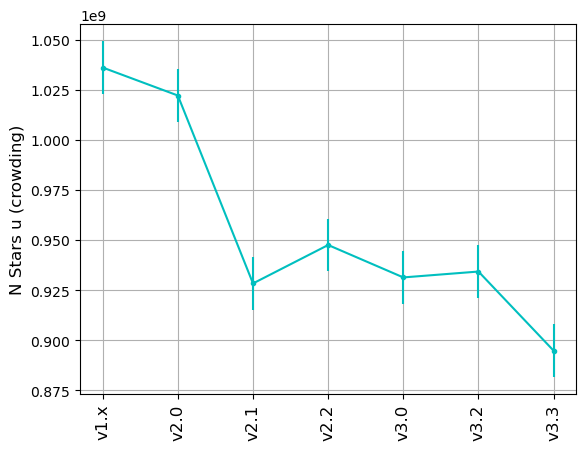

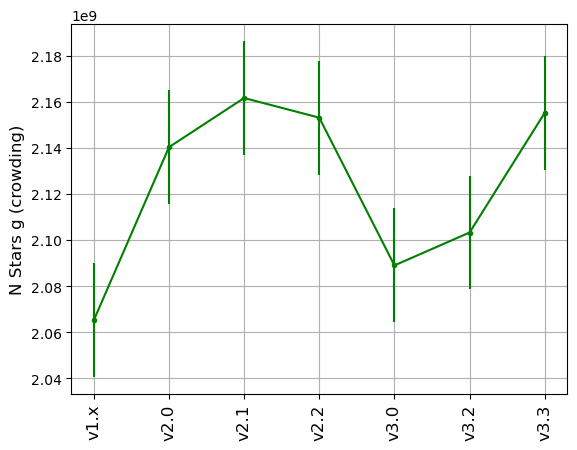

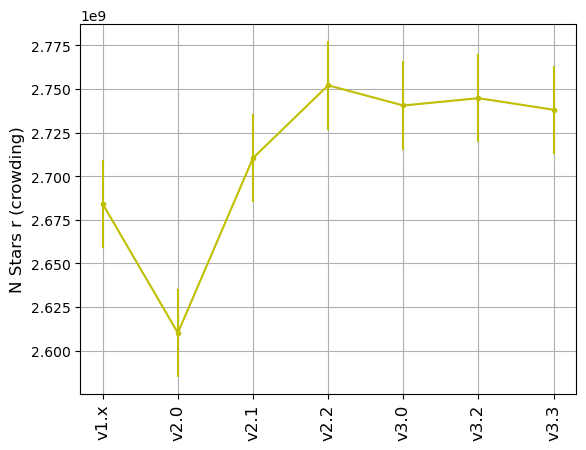

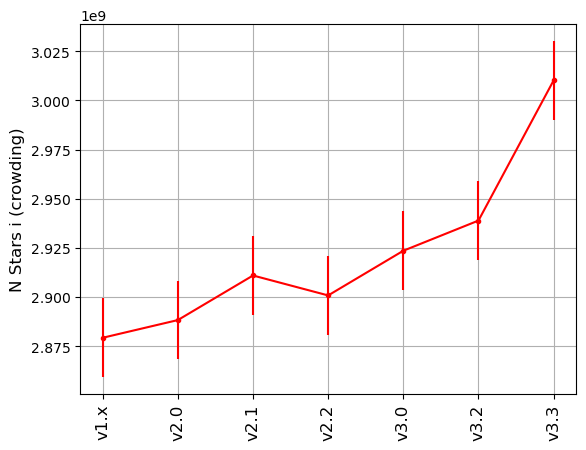

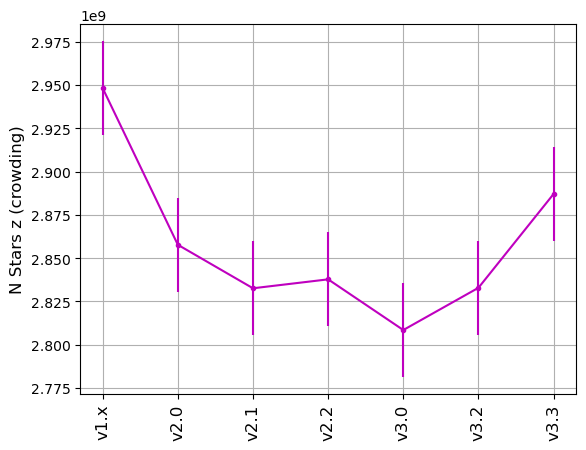

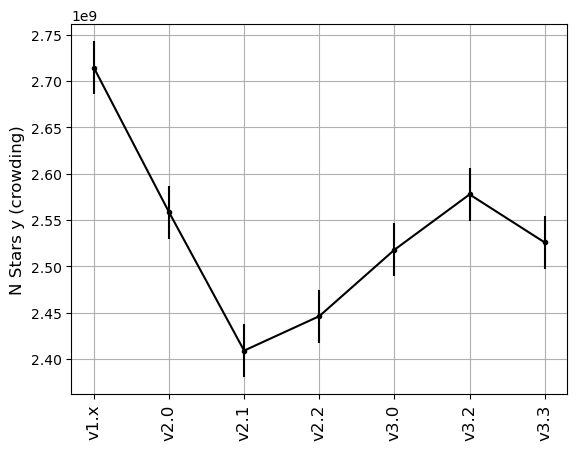

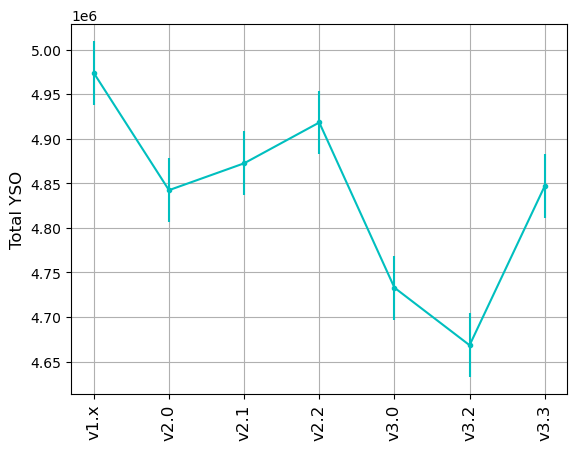

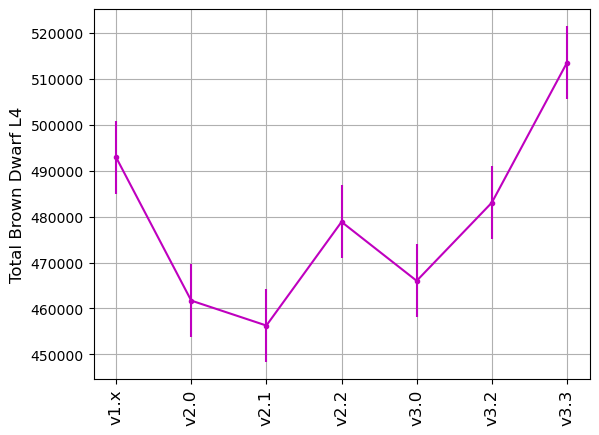

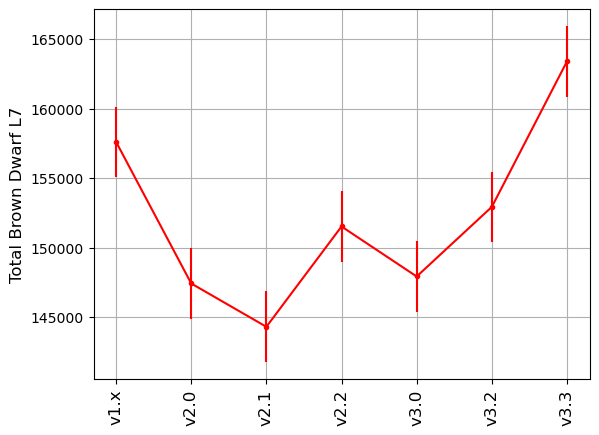

In [406]:
msub = metric_sets.loc['Stars']

for i, m in msub.iterrows():
    fig, ax = plt.subplots() 
    ax.errorbar(list(baseline_dict.values()), summaries.loc[baselines, m['metric']], yerr=dev[m['metric']], 
                color=m['style'][0], marker='.', linestyle='-', label=m['short_name'])
    ax.set_ylabel(m['short_name'], fontsize='large')
    ax.tick_params(axis='x', labelrotation = 90, labelsize='large')
    ax.grid()
    fig.savefig(os.path.join(outdir, m['short_name'] + '.png'), format='png')